Let's first import our sample.csv file. For this we need to use the csv module.

In [799]:
import csv
import sys
import numpy as np
import pandas as pd
import datetime
import dateutil.parser
import pytz
from datetime import tzinfo
from dateutil import parser
import matplotlib.pyplot as plt
from time import time
import matplotlib

plt.rcParams['figure.figsize'] = (20,10)

Now let's import our sample.csv file as follows:

In [152]:
#with open('sample.csv' , 'rb') as f:
#    reader = csv.reader(f)
    
    #note: the commented region below was just to check that the file had been imported correctly.
    
    #for row in reader:
     #   print row
    
    #good!
    
    #the following are for reference Peter:
    
#    col_identifier = [0]    
#    col_name = [1]
#    col_vessel_type = [2]
#    col_length = [3]
#    col_width = [4]
#    col_year_built = [5]
#    col_dwt = [6]
#    col_type = [7]
#    col_main_type = [8]
#    col_sub_type = [9]
#    col_port_id = [10]
#    col_port_name = [11]
#    col_facility_id = [12]
#    col_facility_name = [13]
#    col_berth_id = [14]
#    col_berth_name = [15]
#    col_port_start_ts = [16]
#    col_port_end_ts = [17]
#    col_facility_start_ts = [18]
#    col_facility_end_ts = [19]
#    col_berth_start_ts = [20]
#    col_berth_end_ts = [21]

    #let's split up our columns
    
#    no_cols = [] 
#    for i in range (22):
#        no_cols = no_cols + [i]
    
    #quick check:
    
    #print no_cols
    
    #good! now let's print out a specific column, to make sure we have referenced them correctly:
    
#    for row in reader:
#        col_i = list(row[i] for i in no_cols)
        #print col_i[0]
    
    #good! now let's get on with the task!
    
    #first it would be a good idea to remove the first row of headings, since this data won't be needed now we have
    #captured it:
    
    
    
reader = csv.reader(open('sample.csv' , 'rb'))
    
f=csv.writer(open('sample_top_row_removed.csv' , 'wb'))
    
for line in reader:
    if "dwt" not in line:
        f.writerow(line)
        #print line
        
        
  #good!

Now let's build some stats. We want to show how many ships pass through the port (note: the port is the same, Fawley) but don't stop in the port, on a daily and a weekly basis. Note: In a hint, we are told that not all stops at the port will be at the berth or the facility.

This daily/weekly basis wording should become clearer once we have had a look at the data. Perhaps it means to state for how long each of those events lasts for.

It is clear that all the ships pass through the port, since there is a valid entry in the port_start_ts and port_end_ts columns. However from inspecting the data manually we can see that some of the port_end_ts entries are TIMENOW - this must mean that at the instance the data was pulled the ship was still at the the port. This is fine, but may need to be aware of this for during coding.

It would be a good idea to use what data we have so far - column 8(i=7) looks very useful as it names the type of event. These will be either: berth_enter or berth_exit, enhanced_stop_begin or enhanced_stop_end, facility_enter or facility_exit, port_enter or port_exit (note: I discovered this by simply sorting the data in Excel by alphabetical order). It is important to note that a port_enter and port_exit occurs for every vessel. Whether or not the others happen is for me to ascertain.

A good strategy therefore looks to be, for each port_enter and port_exit event, to collect the port_start_ts and port_end_ts data for that specific event. Then we can omit from this data set those ships which also stop at the berth and/or the facility. WHAT ABOUT THE HINT? Well some ships will stop in the port outside a berth or a facility - these will be those ships that have an enhanced_stop_begin/end but without the berth_enter/exit or facility_enter/exit.

So let's gather the port_start/end_ts data for each port entry which doesn't include a stop. One way to do that is to create a new file with only this data in it. So we need to omit the data which does include a stop.

In [171]:
#first let's store our complete data set in a variable, called "reader"

reader = csv.reader(open('sample_top_row_removed.csv' , 'rb'))
no_stops = csv.writer(open('sample_port_calls_no_stops.csv' , 'wb'))       #set up our write to files
stops = csv.writer(open('sample_port_calls_with_stops.csv' , 'wb'))


prev = [""] * 23       #need prev array to store previous line. 23 columns in sample file

prev[7] = [""]         #store prev entry in 7th column as zero to begin with. 7th column contains type of event

for col in reader:
        
    #print prev[7]        quick check!

    if prev[7] == "port_enter" and col[7] == "port_exit":

        no_stops.writerow(prev)
        no_stops.writerow(col)
        
    else:
        
        
        if prev[7] == "port_enter" and col[7] != "port_exit":
            
            stops.writerow(prev)
        
        if prev[7] == "port_enter" or prev[7] == "facility_enter" or prev[7] == "facility_exit" or prev[7] == "berth_enter" or prev[7] == "berth_exit" or prev[7] == "enhanced_stop_begin" or prev[7] == "enhanced_stop_end": #and col[7] == "facility_enter" or col[7] == "facility_exit" or col[7] == "berth_enter" or col[7] == "berth_exit" or col[7] == "enhanced_stop_begin" or col[7] == "enhanced_stop_end":
       
                stops.writerow(col)
            
    prev[7] = col[7]
    prev = col
    #print prev[7]        
    #print col[1]    
    
    
#Note: At this stage, size of no_stops file should be 884KB, with_stops = 1.5MB. Also added print col[1] to make sure it was outputting correctly

WIND SOLUTION
WIND SOLUTION
WIND SOLUTION
WIND SOLUTION
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ASIAN BREEZE
ASIAN BREEZE
AS

RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON
RED FALCON

RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY

RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE


RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE


VECCHIO BRIDGE
VECCHIO BRIDGE
VECCHIO BRIDGE
VECCHIO BRIDGE
GLOVIS COMPOSER
GLOVIS COMPOSER
GLOVIS COMPOSER
GLOVIS COMPOSER
TORRENS
TORRENS
TORRENS
TORRENS
TOLEDO
TOLEDO
TOLEDO
TOLEDO
FELICITY ACE
FELICITY ACE
FELICITY ACE
FELICITY ACE
GUANGZHOU HIGHWAY
GUANGZHOU HIGHWAY
NORDIC MARIANNE
NORDIC MARIANNE
NORDIC MARIANNE
NORDIC MARIANNE
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
QUEBEC EXPRESS
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
TORM SOFIA
ADVANTAGE PARK
ADVANTAGE PARK
ADVANTAGE PARK
ADVANTAGE PARK
ADVANTAGE PARK
ADVANTAGE PARK
ADVANTAGE PARK
ADVANTAGE PARK
BRITISH KESTREL
BRITISH KESTREL
BRITISH KESTREL
BRITISH KESTREL
BRITISH KESTREL
BRITISH KESTREL
BRITISH KESTREL
BRITISH KESTREL
BRITISH EAGLE
BRITISH EAGLE
BRITISH EAGLE
BRITISH EAGLE
VENERE
VENERE
VENERE
VENERE
VENERE

PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX
PHENIX

BOMAR HAUMEA
BOMAR HAUMEA
BOMAR HAUMEA
BOMAR HAUMEA
BOMAR HAUMEA
BOMAR HAUMEA
BOMAR HAUMEA
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
ELISABETH
BALTIC SAPPHIRE
BALTIC SAPPHIRE
BALTIC SAPPHIRE
BALTIC SAPPHIRE
BALTIC SAPPHIRE
BALTIC SAPPHIRE
BALTIC SAPPHIRE
BALTIC SAPPHIRE
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
YM ANTWERP
SONGA RUBY
SONGA RUBY
SONGA RUBY
SONGA RUBY
SONGA RUBY
SONGA RUBY
SONGA RUBY
SONGA RUBY
RHINO
RHINO
RHINO
RHINO
RHINO
RHINO
RHINO
RHINO
G POSEIDON
G POSEIDON
GLOVIS SOLOMON
GLOVIS SOLOMON
GLOVIS SOLOMON
GLOVIS SOLOMON
MORNING LILY
MORNING LILY
MORNING LILY
MORNING LILY
WIGHT LIGHT
WIGHT LIGHT
BASAT
BASAT
BASAT
BASAT
BASAT
BASAT
BASAT
BASAT
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO
FT QUARTO

NORTHSEA ALPHA
NORTHSEA ALPHA
NORTHSEA ALPHA
NORTHSEA ALPHA
NORTHSEA ALPHA
NORTHSEA ALPHA
KELLY C
KELLY C
KELLY C
KELLY C
KIKKI C
KIKKI C
KIMBERLY C
KIMBERLY C
KIMBERLY C
KIMBERLY C
BRIGHT FORTUNE
BRIGHT FORTUNE
BRIGHT FORTUNE
BRIGHT FORTUNE
BRIGHT FORTUNE
BRIGHT FORTUNE
BRIGHT FORTUNE
BRIGHT FORTUNE
DIONE LEADER
DIONE LEADER
DIONE LEADER
DIONE LEADER
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
DALIAN HIGHWAY
DALIAN HIGHWAY
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
BOCHEM CHENNAI
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
STOLT REDSHANK
SEACLIPPER
SEACLIPPER
SEACLIPPER
SEACLIP

Okay so now we have organised our data into two set: one that contains ships that do not stop in the port and one for ships that do. Let's deal with the first task: 

1) build statistics which shows how many ships pass through the port but do not stop in the port on daily and weekly basis

This clearly suggests that we need to devise a way of displaying the time/date data in columns 17 and 18 (i=16, i=17) of the edited sample file, "sample_port_calls_no_stops.csv".

A good thing to do would be to devise a way to display this data visually. All we need is the number of individual ships, but we should keep track of each ship to check if they are returning or not - this is clearly beneficial from a common sense perspective! So how can we pull these numbers and make sense of them? We will need to do some kind of character recognition, but this is fine and doable in Python. Let's get going!

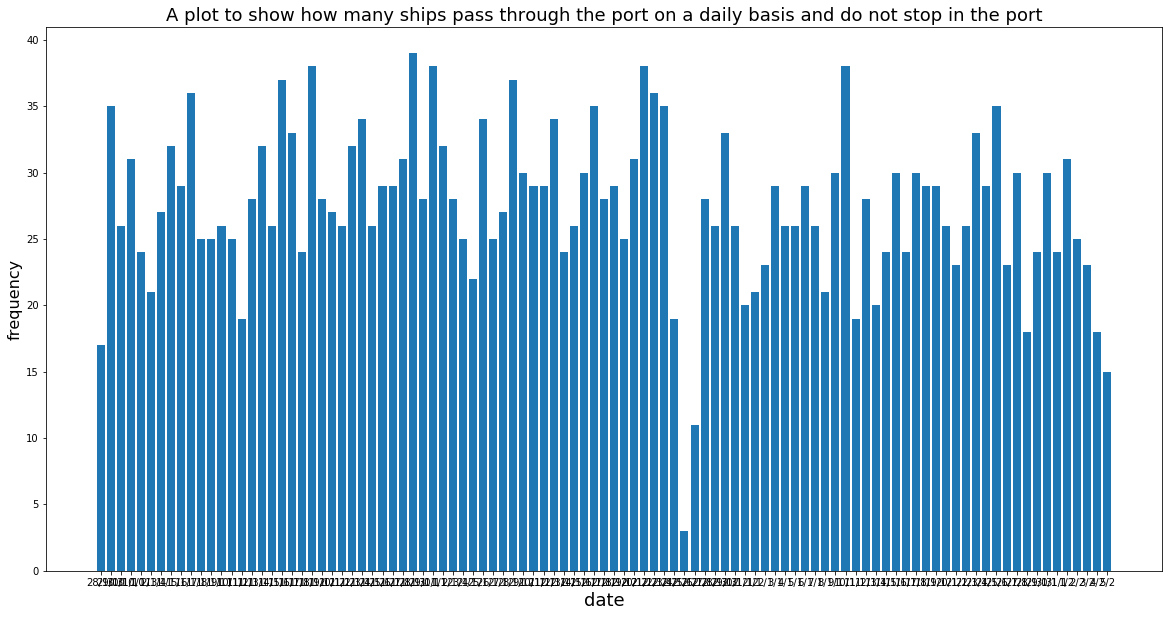

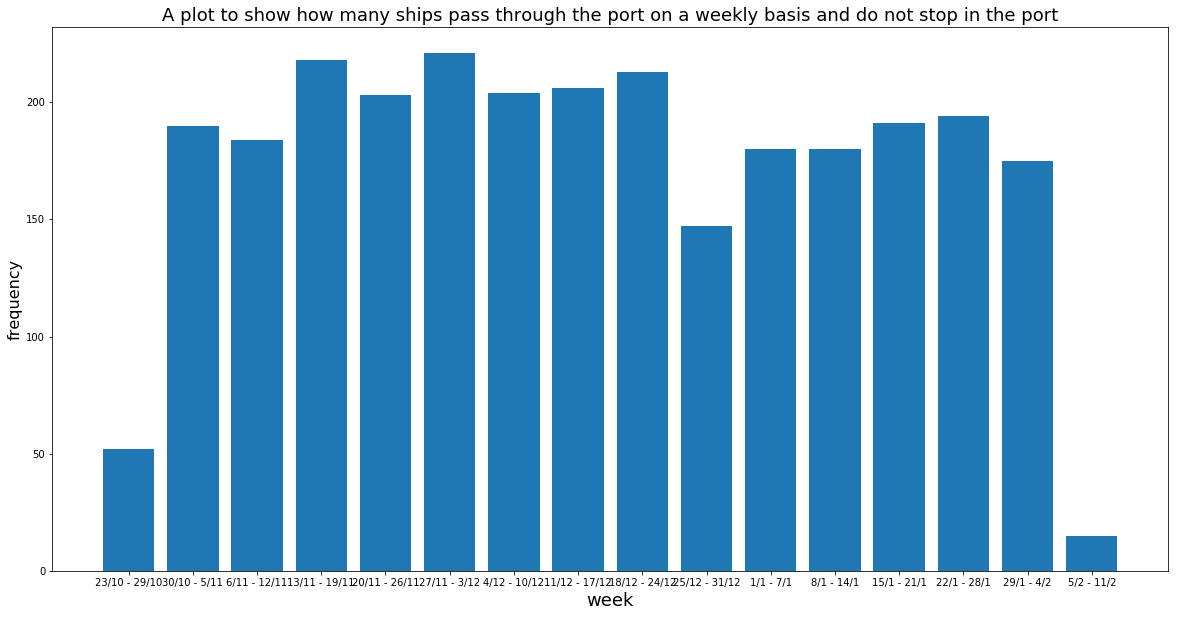

In [172]:
reader = csv.reader(open('sample_port_calls_no_stops.csv' , 'rb'))

year_count_2017 = 0
year_count_2018 = 0

month_count_Oct = 0
month_count_Nov = 0
month_count_Dec = 0
month_count_Jan = 0
month_count_Feb = 0

#now let's set up some arrays to help with organising our dates within the months

#arrives_Oct = ["arr_Oct"] * 32

#for i in range (1,32):
    
#        arr_Oct = [arrives_Oct[i] + "_" + str(i)]
    
#        print arr_Oct

#        arr_Oct = 0
        
#        print arr_Oct_28
        
        
        
        #for i in range (1,32):
    
        #arr_Oct
    
    
arr_Oct_28 = 0
arr_Oct_29 = 0
arr_Oct_30 = 0
arr_Oct_31 = 0


arr_Nov_1 = 0
arr_Nov_2 = 0
arr_Nov_3 = 0
arr_Nov_4 = 0
arr_Nov_5 = 0
arr_Nov_6 = 0
arr_Nov_7 = 0
arr_Nov_8 = 0
arr_Nov_9 = 0
arr_Nov_10 = 0
arr_Nov_11 = 0
arr_Nov_12 = 0
arr_Nov_13 = 0
arr_Nov_14 = 0
arr_Nov_15 = 0
arr_Nov_16 = 0
arr_Nov_17 = 0
arr_Nov_18 = 0
arr_Nov_19 = 0
arr_Nov_20 = 0
arr_Nov_21 = 0
arr_Nov_22 = 0
arr_Nov_23 = 0
arr_Nov_24 = 0
arr_Nov_25 = 0
arr_Nov_26 = 0
arr_Nov_27 = 0
arr_Nov_28 = 0
arr_Nov_29 = 0
arr_Nov_30 = 0

arr_Dec_1 = 0
arr_Dec_2 = 0
arr_Dec_3 = 0
arr_Dec_4 = 0
arr_Dec_5 = 0
arr_Dec_6 = 0
arr_Dec_7 = 0
arr_Dec_8 = 0
arr_Dec_9 = 0
arr_Dec_10 = 0
arr_Dec_11 = 0
arr_Dec_12 = 0
arr_Dec_13 = 0
arr_Dec_14 = 0
arr_Dec_15 = 0
arr_Dec_16 = 0
arr_Dec_17 = 0
arr_Dec_18 = 0
arr_Dec_19 = 0
arr_Dec_20 = 0
arr_Dec_21 = 0
arr_Dec_22 = 0
arr_Dec_23 = 0
arr_Dec_24 = 0
arr_Dec_25 = 0
arr_Dec_26 = 0
arr_Dec_27 = 0
arr_Dec_28 = 0
arr_Dec_29 = 0
arr_Dec_30 = 0
arr_Dec_31 = 0

arr_Jan_1 = 0
arr_Jan_2 = 0
arr_Jan_3 = 0
arr_Jan_4 = 0
arr_Jan_5 = 0
arr_Jan_6 = 0
arr_Jan_7 = 0
arr_Jan_8 = 0
arr_Jan_9 = 0
arr_Jan_10 = 0
arr_Jan_11 = 0
arr_Jan_12 = 0
arr_Jan_13 = 0
arr_Jan_14 = 0
arr_Jan_15 = 0
arr_Jan_16 = 0
arr_Jan_17 = 0
arr_Jan_18 = 0
arr_Jan_19 = 0
arr_Jan_20 = 0
arr_Jan_21 = 0
arr_Jan_22 = 0
arr_Jan_23 = 0
arr_Jan_24 = 0
arr_Jan_25 = 0
arr_Jan_26 = 0
arr_Jan_27 = 0
arr_Jan_28 = 0
arr_Jan_29 = 0
arr_Jan_30 = 0
arr_Jan_31 = 0

arr_Feb_1 = 0
arr_Feb_2 = 0
arr_Feb_3 = 0
arr_Feb_4 = 0
arr_Feb_5 = 0
arr_Feb_6 = 0
arr_Feb_7 = 0
arr_Feb_8 = 0
arr_Feb_9 = 0
arr_Feb_10 = 0
arr_Feb_11 = 0
arr_Feb_12 = 0
arr_Feb_13 = 0
arr_Feb_14 = 0
arr_Feb_15 = 0
arr_Feb_16 = 0
arr_Feb_17 = 0
arr_Feb_18 = 0
arr_Feb_19 = 0
arr_Feb_20 = 0
arr_Feb_21 = 0
arr_Feb_22 = 0
arr_Feb_23 = 0
arr_Feb_24 = 0
arr_Feb_25 = 0
arr_Feb_26 = 0
arr_Feb_27 = 0
arr_Feb_28 = 0

#and now for the weekly totals

wk1 = arr_wk_23_29_Oct_17 = 0
wk2 = arr_wk_30_Oct_5_Nov_17 = 0
wk3 = arr_wk_6_12_Nov_17 = 0
wk4 = arr_wk_13_19_Nov_17 = 0
wk5 = arr_wk_20_26_Nov_17 = 0
wk6 = arr_wk_27_Nov_3_Dec_17 = 0
wk7 = arr_wk_4_10_Dec_17 = 0
wk8 = arr_wk_11_17_Dec_17 = 0
wk9 = arr_wk_18_24_Dec_17 = 0
wk10 = arr_wk_25_31_Dec_17 = 0
wk11 = arr_wk_1_7_Jan_18 = 0
wk12 = arr_wk_8_14_Jan_18 = 0
wk13 = arr_wk_15_21_Jan_18 = 0
wk14 = arr_wk_22_28_Jan_18 = 0
wk15 = arr_wk_29_Jan_4_Feb_18 = 0
wk16 = arr_wk_5_11_Feb_18 = 0





for col in reader:
    
    list_arr = col[16]         #capture our column of arrival dates/times from data set
    
    list_dep = col[17]         #and likewise for the departure dates/times
    
    arr = parser.parse(list_arr)
    #dep = parser.parse(list_dep)
    
    #print arr
    
    #date_arr = datetime.datetime.strptime(list_arr, "%Y-%m-%d %H:%M:%S.%f%z")   note: gave up on this as Python 2 doesn't support %z notation!!! So just used a parse instead.
    
#keep track of the year

    if arr.year == 2017:
        
        year_count_2017 += 1
        
    if arr.year == 2018:
        
        year_count_2018 += 1
        
#October:


    if arr.month == 10:
       
        month_count_Oct += 1
 
        if arr.day == 28:
            
            arr_Oct_28 += 1
            wk1 += 1
        
        if arr.day == 29:
            
            arr_Oct_29 += 1
            wk1 += 1
            
        if arr.day == 30:
            
            arr_Oct_30 += 1
            wk2 += 1
            
        if arr.day == 31:
            
            arr_Oct_31 += 1
            wk2 += 1
                
                
#November:
                
    
    if arr.month == 11:
            
            month_count_Nov += 1
            
            if arr.day == 1:
                
                arr_Nov_1 += 1
                wk2 += 1
                
            if arr.day == 2:
                
                arr_Nov_2 += 1
                wk2 += 1
                
            if arr.day == 3:
                
                arr_Nov_3 += 1
                wk2 += 1
                
            if arr.day == 4:
                
                arr_Nov_4 += 1
                wk2 += 1
                
            if arr.day == 5:
                
                arr_Nov_5 += 1
                wk2 += 1
                
            if arr.day == 6:
                
                arr_Nov_6 += 1
                wk3 += 1
                
            if arr.day == 7:
                
                arr_Nov_7 += 1
                wk3 += 1
                
            if arr.day == 8:
                
                arr_Nov_8 += 1
                wk3 += 1
                
            if arr.day == 9:
                
                arr_Nov_9 += 1
                wk3 += 1
                
            if arr.day == 10:
                
                arr_Nov_10 += 1
                wk3 += 1
                
            if arr.day == 11:
                
                arr_Nov_11 += 1
                wk3 += 1
                
            if arr.day == 12:
                
                arr_Nov_12 += 1
                wk3 += 1
                
            if arr.day == 13:
                
                arr_Nov_13 += 1
                wk4 += 1
                
            if arr.day == 14:
                
                arr_Nov_14 += 1
                wk4 += 1
                
            if arr.day == 15:
                
                arr_Nov_15 += 1
                wk4 += 1
                
            if arr.day == 16:
                
                arr_Nov_16 += 1
                wk4 += 1
                
            if arr.day == 17:
                
                arr_Nov_17 += 1
                wk4 += 1
                
            if arr.day == 18:
                
                arr_Nov_18 += 1
                wk4 += 1
                
            if arr.day == 19:
                
                arr_Nov_19 += 1
                wk4 += 1
                
            if arr.day == 20:
                
                arr_Nov_20 += 1
                wk5 += 1
                
            if arr.day == 21:
                
                arr_Nov_21 += 1
                wk5 += 1
                
            if arr.day == 22:
                
                arr_Nov_22 += 1
                wk5 += 1
                
            if arr.day == 23:
                
                arr_Nov_23 += 1
                wk5 += 1
                
            if arr.day == 24:
                
                arr_Nov_24 += 1
                wk5 += 1
                
            if arr.day == 25:
                
                arr_Nov_25 += 1
                wk5 += 1
                
            if arr.day == 26:
                
                arr_Nov_26 += 1
                wk5 += 1
                
            if arr.day == 27:
                
                arr_Nov_27 += 1
                wk6 += 1
                
            if arr.day == 28:
                
                arr_Nov_28 += 1
                wk6 += 1
                
            if arr.day == 29:
                
                arr_Nov_29 += 1
                wk6 += 1
                
            if arr.day == 30:
                
                arr_Nov_30 += 1
                wk6 += 1
#December:            

    if arr.month == 12:
            
            month_count_Dec += 1
            
            if arr.day == 1:
                
                arr_Dec_1 += 1
                wk6 += 1
                
            if arr.day == 2:
                
                arr_Dec_2 += 1
                wk6 += 1
                
            if arr.day == 3:
                
                arr_Dec_3 += 1
                wk6 += 1
                
            if arr.day == 4:
                
                arr_Dec_4 += 1
                wk7 += 1
                
            if arr.day == 5:
                
                arr_Dec_5 += 1
                wk7 += 1
                
            if arr.day == 6:
                
                arr_Dec_6 += 1
                wk7 += 1
                
            if arr.day == 7:
                
                arr_Dec_7 += 1
                wk7 += 1
                
            if arr.day == 8:
                
                arr_Dec_8 += 1
                wk7 += 1
                
            if arr.day == 9:
                
                arr_Dec_9 += 1
                wk7 += 1
                
            if arr.day == 10:
                
                arr_Dec_10 += 1
                wk7 += 1
                
            if arr.day == 11:
                
                arr_Dec_11 += 1
                wk8 += 1
                
            if arr.day == 12:
                
                arr_Dec_12 += 1
                wk8 += 1
                
            if arr.day == 13:
                
                arr_Dec_13 += 1
                wk8 += 1
                
            if arr.day == 14:
                
                arr_Dec_14 += 1
                wk8 += 1
                
            if arr.day == 15:
                
                arr_Dec_15 += 1
                wk8 += 1
                
            if arr.day == 16:
                
                arr_Dec_16 += 1
                wk8 += 1
                
            if arr.day == 17:
                
                arr_Dec_17 += 1
                wk8 += 1
                
            if arr.day == 18:
                
                arr_Dec_18 += 1
                wk9 += 1
                
            if arr.day == 19:
                
                arr_Dec_19 += 1
                wk9 += 1
                
            if arr.day == 20:
                
                arr_Dec_20 += 1
                wk9 += 1
                
            if arr.day == 21:
                
                arr_Dec_21 += 1
                wk9 += 1
                
            if arr.day == 22:
                
                arr_Dec_22 += 1
                wk9 += 1
                
            if arr.day == 23:
                
                arr_Dec_23 += 1
                wk9 += 1
                
            if arr.day == 24:
                
                arr_Dec_24 += 1
                wk9 += 1
                
            if arr.day == 25:
                
                arr_Dec_25 += 1
                wk10 += 1
                
            if arr.day == 26:
                
                arr_Dec_26 += 1
                wk10 += 1
                
            if arr.day == 27:
                
                arr_Dec_27 += 1
                wk10 += 1
                
            if arr.day == 28:
                
                arr_Dec_28 += 1
                wk10 += 1
                
            if arr.day == 29:
                
                arr_Dec_29 += 1
                wk10 += 1
                
            if arr.day == 30:
                
                arr_Dec_30 += 1
                wk10 += 1
                
            if arr.day == 31:
                
                arr_Dec_31 += 1
                wk10 += 1

 #January:

    if arr.month == 1:
        
            month_count_Jan += 1
            
            if arr.day == 1:
                
                arr_Jan_1 += 1
                wk11 += 1
                
            if arr.day == 2:
                
                arr_Jan_2 += 1
                wk11 += 1
                
            if arr.day == 3:
                
                arr_Jan_3 += 1
                wk11 += 1
                
            if arr.day == 4:
                
                arr_Jan_4 += 1
                wk11 += 1
                
            if arr.day == 5:
                
                arr_Jan_5 += 1
                wk11 += 1
                
            if arr.day == 6:
                
                arr_Jan_6 += 1
                wk11 += 1
                
            if arr.day == 7:
                
                arr_Jan_7 += 1
                wk11 += 1
                
            if arr.day == 8:
                
                arr_Jan_8 += 1
                wk12 += 1
                
            if arr.day == 9:
                
                arr_Jan_9 += 1
                wk12 += 1
                
            if arr.day == 10:
                
                arr_Jan_10 += 1
                wk12 += 1
                
            if arr.day == 11:
                
                arr_Jan_11 += 1
                wk12 += 1
                
            if arr.day == 12:
                
                arr_Jan_12 += 1
                wk12 += 1
                
            if arr.day == 13:
                
                arr_Jan_13 += 1
                wk12 += 1
                
            if arr.day == 14:
                
                arr_Jan_14 += 1
                wk12 += 1
                
            if arr.day == 15:
                
                arr_Jan_15 += 1
                wk13 += 1
                
            if arr.day == 16:
                
                arr_Jan_16 += 1
                wk13 += 1
                
            if arr.day == 17:
                
                arr_Jan_17 += 1
                wk13 += 1
                
            if arr.day == 18:
                
                arr_Jan_18 += 1
                wk13 += 1
                
            if arr.day == 19:
                
                arr_Jan_19 += 1
                wk13 += 1
                
            if arr.day == 20:
                
                arr_Jan_20 += 1
                wk13 += 1
                
            if arr.day == 21:
                
                arr_Jan_21 += 1
                wk13 += 1
                
            if arr.day == 22:
                
                arr_Jan_22 += 1
                wk14 += 1
                
            if arr.day == 23:
                
                arr_Jan_23 += 1
                wk14 += 1
                
            if arr.day == 24:
                
                arr_Jan_24 += 1
                wk14 += 1
                
            if arr.day == 25:
                
                arr_Jan_25 += 1
                wk14 += 1
                
            if arr.day == 26:
                
                arr_Jan_26 += 1
                wk14 += 1
                
            if arr.day == 27:
                
                arr_Jan_27 += 1
                wk14 += 1
                
            if arr.day == 28:
                
                arr_Jan_28 += 1
                wk14 += 1
                
            if arr.day == 29:
                
                arr_Jan_29 += 1
                wk15 += 1
                
            if arr.day == 30:
                
                arr_Jan_30 += 1
                wk15 += 1
                
            if arr.day == 31:
                
                arr_Jan_31 += 1
                wk15 += 1
                
           
                
                
#February:        
        
    if arr.month == 2:
        
            month_count_Feb += 1
            
            if arr.day == 1:
                
                arr_Feb_1 += 1
                wk15 += 1
                
            if arr.day == 2:
                
                arr_Feb_2 += 1
                wk15 += 1
                
            if arr.day == 3:
                
                arr_Feb_3 += 1
                wk15 += 1
                
            if arr.day == 4:
                
                arr_Feb_4 += 1
                wk15 += 1
                
            if arr.day == 5:
                
                arr_Feb_5 += 1
                wk16 += 1
                
            
                
            
#quick check:      
    
    #if arr.year == 2017:
        
        #print arr.year
        
#print month_count_Jan + month_count_Feb + month_count_Nov + month_count_Dec + month_count_Oct      

#Note: we need to divide by two since for every data entry there is a port entry and port departure, but this information 
#is captured in just one of the rows


x_day = (arr_Oct_28,arr_Oct_29,arr_Oct_30,arr_Oct_31,arr_Nov_1,arr_Nov_2,arr_Nov_3,arr_Nov_4,arr_Nov_5,arr_Nov_6,arr_Nov_7,arr_Nov_8,arr_Nov_9,arr_Nov_10,arr_Nov_11,arr_Nov_12,arr_Nov_13,arr_Nov_14,arr_Nov_15,arr_Nov_16,arr_Nov_17,arr_Nov_18,arr_Nov_19,arr_Nov_20,arr_Nov_21,arr_Nov_22,arr_Nov_23,arr_Nov_24,arr_Nov_25,arr_Nov_26,arr_Nov_27,arr_Nov_28,arr_Nov_29,arr_Nov_30,arr_Dec_1,arr_Dec_2,arr_Dec_3,arr_Dec_4,arr_Dec_5,arr_Dec_6,arr_Dec_7,arr_Dec_8,arr_Dec_9,arr_Dec_10,arr_Dec_11,arr_Dec_12,arr_Dec_13,arr_Dec_14,arr_Dec_15,arr_Dec_16,arr_Dec_17,arr_Dec_18,arr_Dec_19,arr_Dec_20,arr_Dec_21,arr_Dec_22,arr_Dec_23,arr_Dec_24,arr_Dec_25,arr_Dec_26,arr_Dec_27,arr_Dec_28,arr_Dec_29,arr_Dec_30,arr_Dec_31,arr_Jan_1,arr_Jan_2,arr_Jan_3,arr_Jan_4,arr_Jan_5,arr_Jan_6,arr_Jan_7,arr_Jan_8,arr_Jan_9,arr_Jan_10,arr_Jan_11,arr_Jan_12,arr_Jan_13,arr_Jan_14,arr_Jan_15,arr_Jan_16,arr_Jan_17,arr_Jan_18,arr_Jan_19,arr_Jan_20,arr_Jan_21,arr_Jan_22,arr_Jan_23,arr_Jan_24,arr_Jan_25,arr_Jan_26,arr_Jan_27,arr_Jan_28,arr_Jan_29,arr_Jan_30,arr_Jan_31,arr_Feb_1,arr_Feb_2,arr_Feb_3,arr_Feb_4,arr_Feb_5)
x_day_correct = tuple(i/2 for i in x_day)

y_day = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]


plt.figure(figsize=(20,10))

plt.bar(y_day,x_day_correct)

#fig.suptitle('A plot to show the frequency of ships passing into the port which do not stop', fontsize=20)
plt.title('A plot to show how many ships pass through the port on a daily basis and do not stop in the port',fontsize=18)
plt.xlabel('date', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

#labels = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]
#plt.xticks(x, labels)
#plt.xticks(x,labels,rotation=90)
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.01)
#plt.show()


#now let's do the weekly plot

x_week = (wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16)
x_week_correct = tuple(i/2 for i in x_week)

y_week = ["23/10 - 29/10" , "30/10 - 5/11" , "6/11 - 12/11" , "13/11 - 19/11" , "20/11 - 26/11" , "27/11 - 3/12" , "4/12 - 10/12" , "11/12 - 17/12" , "18/12 - 24/12" , "25/12 - 31/12" , "1/1 - 7/1" , "8/1 - 14/1" , "15/1 - 21/1" , "22/1 - 28/1" , "29/1 - 4/2" , "5/2 - 11/2"]

plt.figure(figsize=(20,10))

plt.bar(y_week,x_week_correct)

#fig.suptitle('A plot to show the frequency of ships passing into the port which do not stop', fontsize=20)
plt.title('A plot to show how many ships pass through the port on a weekly basis and do not stop in the port',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

#labels = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]
#plt.xticks(x, labels)
#plt.xticks(x,labels,rotation=90)
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.01)
#plt.show()

Okay so now we have completed the second part of the task (although we should go back and make sure we have included all the correct ships, i.e. those that don't stop at all. Also we might like to include the duration of the port stay in these stats too. Can do this later Peter.)

The third task is:

3. for ships that do stop inside the port, build statistics on types of ships and sizes (dwt)

So a logical approach would perhaps be to filter out all the ships that have an enhanced stop. This information is contained in column 8 again (i=7). We note that we don't actually have a time for the enhanced time stop begin/end - only the time that that ship enter either the berth or the facility (along with the port).

Perhaps the first thing to check is if there are any ships that enter a facility ONLY and have an enhanced stop (i.e. they don't enter a berth at all during that time) - there are!

I note from a quick scan through the sample data file that there ARE ships that enter a facility and exit, then re-enter the facility and then go into a berth....

We note that we are not given the enhanced stop begin/end time in the sample data file. That is okay though I think - we assume that a berth entry time/berth exit time contains that information. And similarly for the facility enter time/facility exit time if it includes an enhanced stop, and if the time spent in the facility is above a certain threshold time parameter.

Also we should consider Anton's answer to my query, upon asking if an antrance to a facility can include a stop. He replied that we might consider setting a time limit (say an hour - make this a variable!) for an entrance into a facility to be included as a stop.

So a good plan of action is to:

a) for every enhanced stop event, pull the time information for that event, along with dwt and vessel_type

b) for every facility enter, and every berth enter, check to see if the time between entrance and exit is above a certain time threshold parameter (let's say 1 hour). If it is, pull the time information for that event, along with the dwt and vessel_type

So let's get going!

NO STOP in facility
NO STOP in facility
NO STOP in facility
NO STOP in facility
NO STOP in facility
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
NO STOP in berth for another time
NO STOP in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully for enhanced sto

ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
NO STOP in facility
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
Time unknown due to being in port at time data drawn
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
NO STOP in facility
NO STOP in facility
NO STOP in facility


NO STOP in berth
ship stopped fully at facility
NO STOP in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully for enhanced stop
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth for another time
NO STOP in berth
NO STOP in berth for another time
NO STOP for enhanced stop in berth
ship stopped fully at facility
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP for enhanced stop
ship stopped fully at berth
ship stopped fully for enhanced stop
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth
NO STOP in berth for another time
NO STOP for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully at facility
NO STOP in berth
NO STOP in facility
ship stoppe

NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP in berth for another time
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP for enhanced stop
NO STOP in berth for another time
NO STOP in berth
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP for enhanced stop
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
ship stopped fully at facility
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP in berth
NO STOP in berth for another time
NO STOP in berth
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth for another time
NO STOP 

ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced 

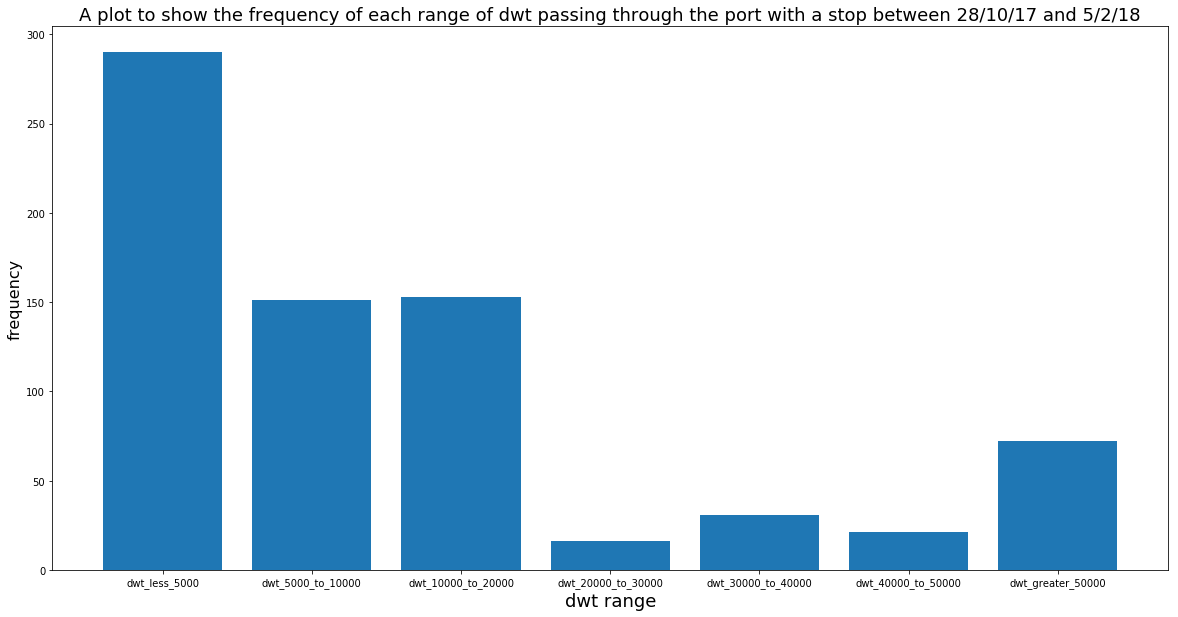

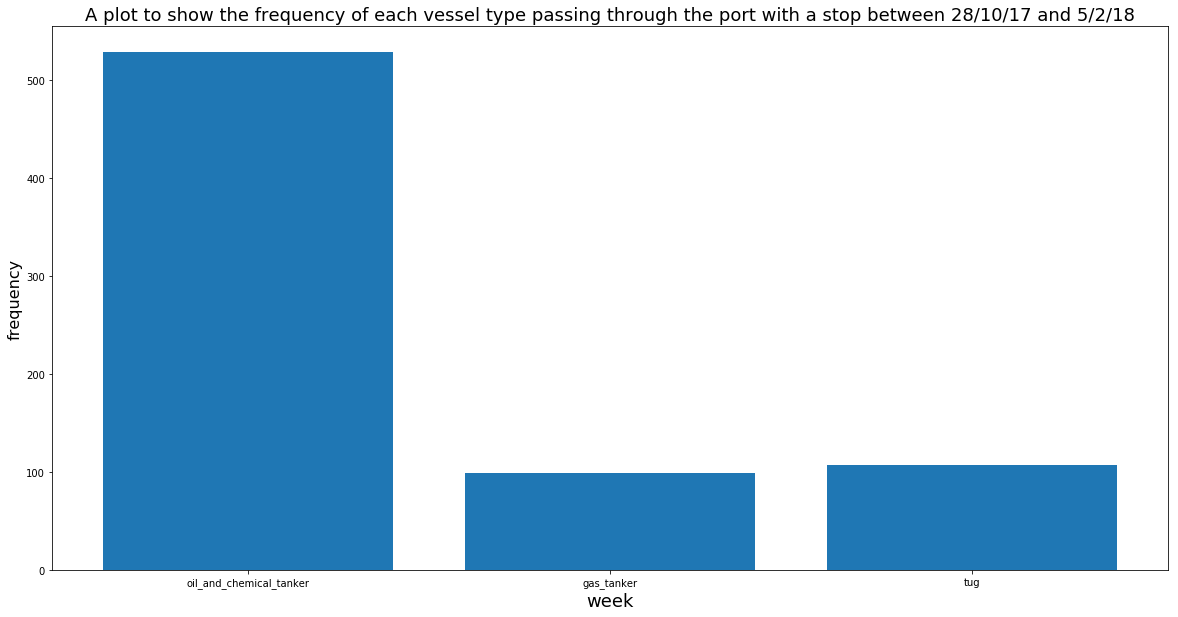

In [657]:
reader = csv.reader(open('sample_port_calls_with_stops.csv' , 'rb'))
no_stops_more = csv.writer(open('sample_port_calls_no_stops_more.csv' , 'wb'))

#count_enhanced_stops = 0

#prev_IMO = [""] * 23
#prev_IMO[0] = [""]

prev = [""] * 23
prev[7] = [""]

dwt = []
type_of_vessel = []

T_max = 3600        #this is the max time we set to define a stop, in seconds. Set to 1 hour = 60s * 60s = 3600s 


for col in reader:
    
    
    if prev[7] == "facility_enter" and col[7] == "facility_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_facility = col[18]
            t_enh_stop_end_facility = col[19]
        
            t_facility_begin = parser.parse(t_enh_stop_begin_facility)
            t_facility_end = parser.parse(t_enh_stop_end_facility)
        
            t_facility_delta = t_facility_end - t_facility_begin
        
            if t_facility_delta.total_seconds() > T_max:

                print "ship stopped fully at facility"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in facility"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
                
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
        
        #print col[1]
        
        
        
    if prev[7] == "berth_enter" and col[7] == "berth_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_berth = col[20]
            t_enh_stop_end_berth = col[21]
    
            t_berth_begin = parser.parse(t_enh_stop_begin_berth)
            t_berth_end = parser.parse(t_enh_stop_end_berth)
        
            t_berth_delta = t_berth_end - t_berth_begin
        
            if t_berth_delta.total_seconds() > T_max:

                print "ship stopped fully at berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
        
        #print col[1]
        
    if prev[7] == "enhanced_stop_begin" and col[7] == "enhanced_stop_end":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
            
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
        
            if t_enh_stop_delta.total_seconds() > T_max:

                print "ship stopped fully for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
            
        #print col[1]
        
    if prev[7] == "berth_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
        
            if t_enh_stop_delta.total_seconds() > T_max:

                print "ship stopped fully for enhanced stop in berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP for enhanced stop in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)

        else:
            
            print "Time unknown due to being in port at time data drawn"       
            #print col[1]
            
        #print col[1]
        
    if prev[7] == "berth_exit" and col[7] == "berth_enter":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_berth = col[20]
            t_enh_stop_end_berth = col[21]
    
            t_berth_begin = parser.parse(t_enh_stop_begin_berth)
            t_berth_end = parser.parse(t_enh_stop_end_berth)
        
            t_berth_delta = t_berth_end - t_berth_begin
        
            if t_berth_delta.total_seconds() > T_max:

                print "ship stopped fully at berth for another time"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in berth for another time"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
            
        #print col[1]
        
        
    if prev[7] == "port_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_port = col[16]
            t_enh_stop_end_port = col[17]
        
            t_port_begin = parser.parse(t_enh_stop_begin_port)
            t_port_end = parser.parse(t_enh_stop_end_port)
        
            t_port_delta = t_port_end - t_port_begin
        
            if t_port_delta.total_seconds() > T_max:

                print "ship stopped fully at port for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in berth for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]     
        
        
 #   prev_IMO[0] = col[0]
 #   prev_IMO = col
            
    prev[7] = col[7]
    prev = col

    
    
 #   type_of_vessel.append(col[2])
 #   dwt.append(col[6])
 #   count_enhanced_stops += 1    


#Ok so now let's build some stats!


dwt_freq = []

for f in dwt:
    dwt_freq.append(dwt.count(f))
    
#print dwt_freq

type_of_vessel_freq = []

for t in type_of_vessel:
    type_of_vessel_freq.append(type_of_vessel.count(t))
    
    

#plt.figure(figsize=(20,10))

#plt.bar(dwt, dwt_freq)
#plt.title('A plot to show the frequency of each type of dwt passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
#plt.xlabel('week', fontsize=18)
#plt.ylabel('frequency', fontsize=16)
#plt.show()

#Okay so the dwt is rarely going to be the same, since each cargo will weigh different! So a better thing to do is 
#to display a RANGE of dwts. Let's do this!

#print dwt

dwt_less_5000_tally = 0
dwt_5000_to_10000_tally = 0
dwt_10000_to_20000_tally = 0
dwt_20000_to_30000_tally = 0
dwt_30000_to_40000_tally = 0
dwt_40000_to_50000_tally = 0
dwt_greater_50000_tally = 0

#need to convert dwt into integer list

dwt = map(int,dwt)


for i in dwt:
    
    if i <= 5000:
    
        dwt_less_5000_tally += 1
        
    if i > 5000 and i <= 10000:
    
        dwt_5000_to_10000_tally += 1
    
    if i > 10000 and i <= 20000:
    
        dwt_10000_to_20000_tally += 1
        
    if i > 20000 and i <= 30000:
    
        dwt_20000_to_30000_tally += 1
        
    if i > 30000 and i <= 40000:
    
        dwt_30000_to_40000_tally += 1
        
    if i > 40000 and i <= 50000:
    
        dwt_40000_to_50000_tally += 1
        
    if i > 50000:
    
        dwt_greater_50000_tally += 1

#print dwt_less_5000

#print dwt_less_5000_tally


dwt_list = ['dwt_less_5000' , 'dwt_5000_to_10000' , 'dwt_10000_to_20000' , 'dwt_20000_to_30000' , 'dwt_30000_to_40000' , 'dwt_40000_to_50000' , 'dwt_greater_50000']

#print dwt_list
    
plt.figure(figsize=(20,10))

plt.bar(dwt_list , (dwt_less_5000_tally, dwt_5000_to_10000_tally, dwt_10000_to_20000_tally, dwt_20000_to_30000_tally, dwt_30000_to_40000_tally, dwt_40000_to_50000_tally, dwt_greater_50000_tally) )
plt.title('A plot to show the frequency of each range of dwt passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('dwt range', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  



plt.figure(figsize=(20,10))

plt.bar(type_of_vessel, type_of_vessel_freq)
plt.title('A plot to show the frequency of each vessel type passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  


Okay that's looking quite good. But we also want to take into account the fact that some stops in a berth don't have an enhanced stop/start, and that some stops take place outside a berth (i.e. in a facility). One way to do this is to put a time threshold limit on how long a stop takes place for, call it T_max. We can use the time and date data for each consecutive berth entrance/exit and facililty entrance/exit (i.e. those which don't include an enhanced stop) to work out the time difference between each entrance/exit event. We also note that if the facility entrance/exit event or berth entrance/exit event doesn't exceed T_max then we need to add that event to the "no_stops" csv file and re-do the stats for all of those at the end - can do this as a last step Peter. So let's get cracking - amend the code above!

We are going to have to filter out the TIMENOW data too. Also need to make sure we are not duplicating data from the same ship. How can we capture the information for the same ship doing multiple "stops"? This might be a problem for another time.... Also don't forget that, when we don't have a stop for a given ship, we need to move that data into the "no_stops" csv file and re-calculate those stats.

In [658]:
#Now let's merge our two "no stops" csv files:

reader_one = csv.reader(open('sample_port_calls_no_stops.csv' , 'rb'))
reader_two = csv.reader(open('sample_port_calls_no_stops_more.csv' , 'rb'))

writer = csv.writer(open('sample_port_calls_no_stops_merged.csv' , 'wb'))


for line in reader_one:
    
    writer.writerow(line)
    #print line
        
for line in reader_two:
    
    writer.writerow(line)
    #print line

And now we need to re-do the stats for the merged no_stops data (just copy and paste the above).

This ship stayed for more than 12 hours in the port:  SARAH WONSILD 1 day, 20:19:17.467000 
This ship stayed for more than 12 hours in the port:  FORTH FISHER 20:39:20.588000 
This ship stayed for more than 12 hours in the port:  WHITCHAMPION 12:05:57.306000 
This ship stayed for more than 12 hours in the port:  MARY A 1 day, 8:51:02.370000 
This ship stayed for more than 12 hours in the port:  WHITONIA 12:49:56.476000 
This ship stayed for more than 12 hours in the port:  BRISOTE 19:59:53.443000 
This ship stayed for more than 12 hours in the port:  BRISOTE 18:53:30.116000 


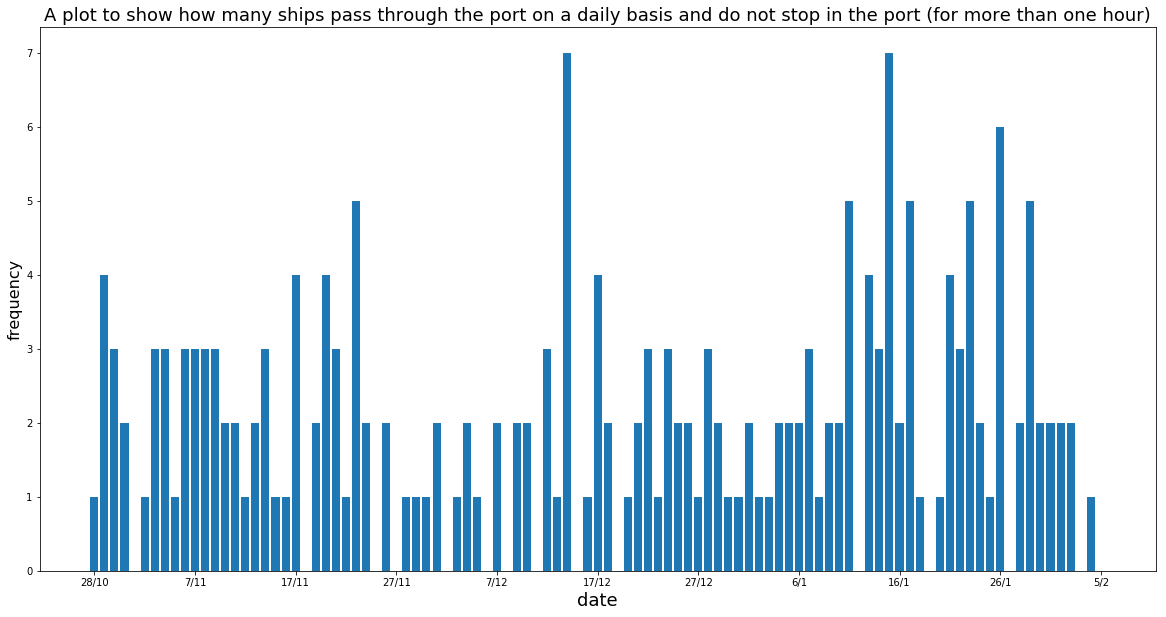

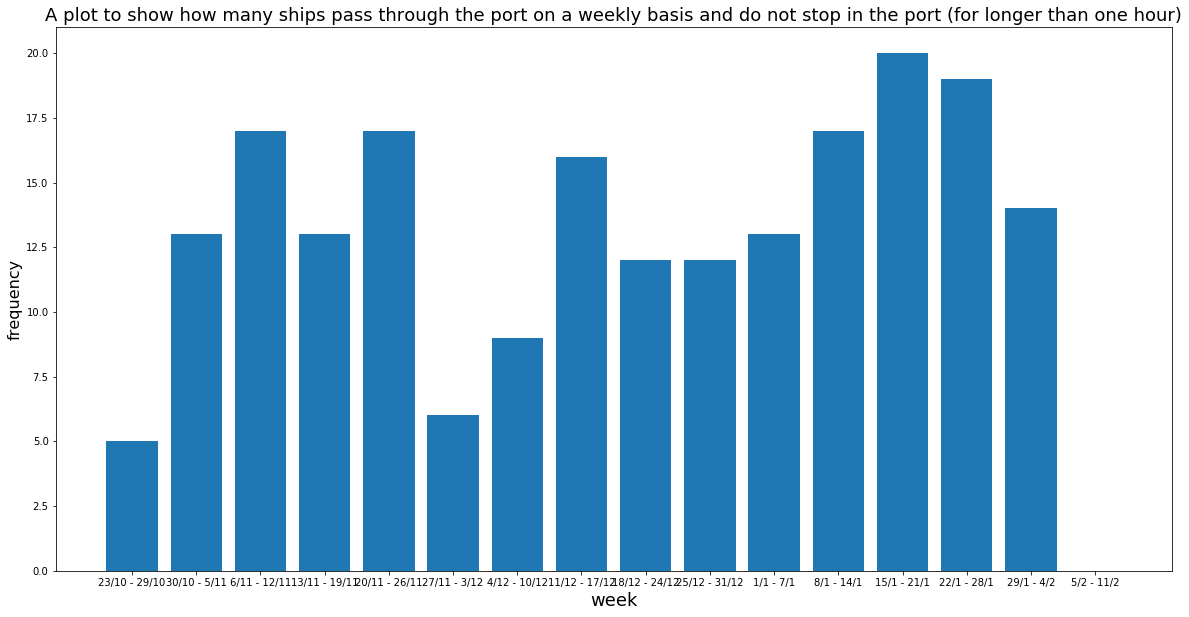

In [790]:
reader_merged = csv.reader(open('sample_port_calls_no_stops_merged.csv' , 'rb'))   #just changed this to the new, merged file

T_max = 3600 * 12

year_count_2017 = 0
year_count_2018 = 0

month_count_Oct = 0
month_count_Nov = 0
month_count_Dec = 0
month_count_Jan = 0
month_count_Feb = 0
    
arr_Oct_28 = 0
arr_Oct_29 = 0
arr_Oct_30 = 0
arr_Oct_31 = 0

arr_Nov_1 = 0
arr_Nov_2 = 0
arr_Nov_3 = 0
arr_Nov_4 = 0
arr_Nov_5 = 0
arr_Nov_6 = 0
arr_Nov_7 = 0
arr_Nov_8 = 0
arr_Nov_9 = 0
arr_Nov_10 = 0
arr_Nov_11 = 0
arr_Nov_12 = 0
arr_Nov_13 = 0
arr_Nov_14 = 0
arr_Nov_15 = 0
arr_Nov_16 = 0
arr_Nov_17 = 0
arr_Nov_18 = 0
arr_Nov_19 = 0
arr_Nov_20 = 0
arr_Nov_21 = 0
arr_Nov_22 = 0
arr_Nov_23 = 0
arr_Nov_24 = 0
arr_Nov_25 = 0
arr_Nov_26 = 0
arr_Nov_27 = 0
arr_Nov_28 = 0
arr_Nov_29 = 0
arr_Nov_30 = 0

arr_Dec_1 = 0
arr_Dec_2 = 0
arr_Dec_3 = 0
arr_Dec_4 = 0
arr_Dec_5 = 0
arr_Dec_6 = 0
arr_Dec_7 = 0
arr_Dec_8 = 0
arr_Dec_9 = 0
arr_Dec_10 = 0
arr_Dec_11 = 0
arr_Dec_12 = 0
arr_Dec_13 = 0
arr_Dec_14 = 0
arr_Dec_15 = 0
arr_Dec_16 = 0
arr_Dec_17 = 0
arr_Dec_18 = 0
arr_Dec_19 = 0
arr_Dec_20 = 0
arr_Dec_21 = 0
arr_Dec_22 = 0
arr_Dec_23 = 0
arr_Dec_24 = 0
arr_Dec_25 = 0
arr_Dec_26 = 0
arr_Dec_27 = 0
arr_Dec_28 = 0
arr_Dec_29 = 0
arr_Dec_30 = 0
arr_Dec_31 = 0

arr_Jan_1 = 0
arr_Jan_2 = 0
arr_Jan_3 = 0
arr_Jan_4 = 0
arr_Jan_5 = 0
arr_Jan_6 = 0
arr_Jan_7 = 0
arr_Jan_8 = 0
arr_Jan_9 = 0
arr_Jan_10 = 0
arr_Jan_11 = 0
arr_Jan_12 = 0
arr_Jan_13 = 0
arr_Jan_14 = 0
arr_Jan_15 = 0
arr_Jan_16 = 0
arr_Jan_17 = 0
arr_Jan_18 = 0
arr_Jan_19 = 0
arr_Jan_20 = 0
arr_Jan_21 = 0
arr_Jan_22 = 0
arr_Jan_23 = 0
arr_Jan_24 = 0
arr_Jan_25 = 0
arr_Jan_26 = 0
arr_Jan_27 = 0
arr_Jan_28 = 0
arr_Jan_29 = 0
arr_Jan_30 = 0
arr_Jan_31 = 0

arr_Feb_1 = 0
arr_Feb_2 = 0
arr_Feb_3 = 0
arr_Feb_4 = 0
arr_Feb_5 = 0
arr_Feb_6 = 0
arr_Feb_7 = 0
arr_Feb_8 = 0
arr_Feb_9 = 0
arr_Feb_10 = 0
arr_Feb_11 = 0
arr_Feb_12 = 0
arr_Feb_13 = 0
arr_Feb_14 = 0
arr_Feb_15 = 0
arr_Feb_16 = 0
arr_Feb_17 = 0
arr_Feb_18 = 0
arr_Feb_19 = 0
arr_Feb_20 = 0
arr_Feb_21 = 0
arr_Feb_22 = 0
arr_Feb_23 = 0
arr_Feb_24 = 0
arr_Feb_25 = 0
arr_Feb_26 = 0
arr_Feb_27 = 0
arr_Feb_28 = 0

#and now for the weekly totals

wk1 = arr_wk_23_29_Oct_17 = 0
wk2 = arr_wk_30_Oct_5_Nov_17 = 0
wk3 = arr_wk_6_12_Nov_17 = 0
wk4 = arr_wk_13_19_Nov_17 = 0
wk5 = arr_wk_20_26_Nov_17 = 0
wk6 = arr_wk_27_Nov_3_Dec_17 = 0
wk7 = arr_wk_4_10_Dec_17 = 0
wk8 = arr_wk_11_17_Dec_17 = 0
wk9 = arr_wk_18_24_Dec_17 = 0
wk10 = arr_wk_25_31_Dec_17 = 0
wk11 = arr_wk_1_7_Jan_18 = 0
wk12 = arr_wk_8_14_Jan_18 = 0
wk13 = arr_wk_15_21_Jan_18 = 0
wk14 = arr_wk_22_28_Jan_18 = 0
wk15 = arr_wk_29_Jan_4_Feb_18 = 0
wk16 = arr_wk_5_11_Feb_18 = 0

prev = [""] * 23

prev[16] = [""]
prev[18] = [""]
prev[20] = [""]



for col in reader_merged:

#need to add in a few if statements to make sure we are capturing the correct arrival time for each event    

    
    if col[16] == prev[16] :           #need this to make sure we aren't counting data twice
            
        continue
        
    elif col[18] == "" and col[20] == "" :

        list_arr = col[16]
         
        if col[17] != "TIMENOW":       #actually maybe we don't need these if statements since there are no "TIMENOW"s in this data set. But keep in just in case needed in the future
        
            list_dep = col[17]
            
        else:
                
            print "Departure time unknown as data drawn when ship in dock"
    
    if col[18] == prev[18] :                 #also needed to make sure not counting data twice
    
        continue
                   
    elif col[18] != "" and col[20] == "" :
                
            list_arr = col[18]
        
            if col[19] != "TIMENOW":
        
                list_dep = col[19]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"

    if col[20] == prev[20] :          #and once again to make sure not counting data twice
        
        continue
    
    elif col[18] != "" and col[20] != "" :
        
            list_arr = col[20]         
            
            if col[21] != ["TIMENOW"]:
                
                list_dep = col[21]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"
            
    
    arr = parser.parse(list_arr)
    dep = parser.parse(list_dep)

    t_delta = dep - arr
    
    
    if t_delta.total_seconds() > T_max:
    
        print "This ship stayed for more than 12 hours in the port: " , col[1] , t_delta , ""
    
    
    prev[16] = col[16]
    prev[18] = col[18]
    prev[20] = col[20]
    
    prev = col
    
    
#keep track of the year

    if arr.year == 2017:
        
        year_count_2017 += 1
        
    if arr.year == 2018:
        
        year_count_2018 += 1
        
#October:


    if arr.month == 10:
       
        month_count_Oct += 1
 
        if arr.day == 28:
            
            arr_Oct_28 += 1
            wk1 += 1
        
        if arr.day == 29:
            
            arr_Oct_29 += 1
            wk1 += 1
            
        if arr.day == 30:
            
            arr_Oct_30 += 1
            wk2 += 1
            
        if arr.day == 31:
            
            arr_Oct_31 += 1
            wk2 += 1
                
                
#November:
                
    
    if arr.month == 11:
            
            month_count_Nov += 1
            
            if arr.day == 1:
                
                arr_Nov_1 += 1
                wk2 += 1
                
            if arr.day == 2:
                
                arr_Nov_2 += 1
                wk2 += 1
                
            if arr.day == 3:
                
                arr_Nov_3 += 1
                wk2 += 1
                
            if arr.day == 4:
                
                arr_Nov_4 += 1
                wk2 += 1
                
            if arr.day == 5:
                
                arr_Nov_5 += 1
                wk2 += 1
                
            if arr.day == 6:
                
                arr_Nov_6 += 1
                wk3 += 1
                
            if arr.day == 7:
                
                arr_Nov_7 += 1
                wk3 += 1
                
            if arr.day == 8:
                
                arr_Nov_8 += 1
                wk3 += 1
                
            if arr.day == 9:
                
                arr_Nov_9 += 1
                wk3 += 1
                
            if arr.day == 10:
                
                arr_Nov_10 += 1
                wk3 += 1
                
            if arr.day == 11:
                
                arr_Nov_11 += 1
                wk3 += 1
                
            if arr.day == 12:
                
                arr_Nov_12 += 1
                wk3 += 1
                
            if arr.day == 13:
                
                arr_Nov_13 += 1
                wk4 += 1
                
            if arr.day == 14:
                
                arr_Nov_14 += 1
                wk4 += 1
                
            if arr.day == 15:
                
                arr_Nov_15 += 1
                wk4 += 1
                
            if arr.day == 16:
                
                arr_Nov_16 += 1
                wk4 += 1
                
            if arr.day == 17:
                
                arr_Nov_17 += 1
                wk4 += 1
                
            if arr.day == 18:
                
                arr_Nov_18 += 1
                wk4 += 1
                
            if arr.day == 19:
                
                arr_Nov_19 += 1
                wk4 += 1
                
            if arr.day == 20:
                
                arr_Nov_20 += 1
                wk5 += 1
                
            if arr.day == 21:
                
                arr_Nov_21 += 1
                wk5 += 1
                
            if arr.day == 22:
                
                arr_Nov_22 += 1
                wk5 += 1
                
            if arr.day == 23:
                
                arr_Nov_23 += 1
                wk5 += 1
                
            if arr.day == 24:
                
                arr_Nov_24 += 1
                wk5 += 1
                
            if arr.day == 25:
                
                arr_Nov_25 += 1
                wk5 += 1
                
            if arr.day == 26:
                
                arr_Nov_26 += 1
                wk5 += 1
                
            if arr.day == 27:
                
                arr_Nov_27 += 1
                wk6 += 1
                
            if arr.day == 28:
                
                arr_Nov_28 += 1
                wk6 += 1
                
            if arr.day == 29:
                
                arr_Nov_29 += 1
                wk6 += 1
                
            if arr.day == 30:
                
                arr_Nov_30 += 1
                wk6 += 1
#December:            

    if arr.month == 12:
            
            month_count_Dec += 1
            
            if arr.day == 1:
                
                arr_Dec_1 += 1
                wk6 += 1
                
            if arr.day == 2:
                
                arr_Dec_2 += 1
                wk6 += 1
                
            if arr.day == 3:
                
                arr_Dec_3 += 1
                wk6 += 1
                
            if arr.day == 4:
                
                arr_Dec_4 += 1
                wk7 += 1
                
            if arr.day == 5:
                
                arr_Dec_5 += 1
                wk7 += 1
                
            if arr.day == 6:
                
                arr_Dec_6 += 1
                wk7 += 1
                
            if arr.day == 7:
                
                arr_Dec_7 += 1
                wk7 += 1
                
            if arr.day == 8:
                
                arr_Dec_8 += 1
                wk7 += 1
                
            if arr.day == 9:
                
                arr_Dec_9 += 1
                wk7 += 1
                
            if arr.day == 10:
                
                arr_Dec_10 += 1
                wk7 += 1
                
            if arr.day == 11:
                
                arr_Dec_11 += 1
                wk8 += 1
                
            if arr.day == 12:
                
                arr_Dec_12 += 1
                wk8 += 1
                
            if arr.day == 13:
                
                arr_Dec_13 += 1
                wk8 += 1
                
            if arr.day == 14:
                
                arr_Dec_14 += 1
                wk8 += 1
                
            if arr.day == 15:
                
                arr_Dec_15 += 1
                wk8 += 1
                
            if arr.day == 16:
                
                arr_Dec_16 += 1
                wk8 += 1
                
            if arr.day == 17:
                
                arr_Dec_17 += 1
                wk8 += 1
                
            if arr.day == 18:
                
                arr_Dec_18 += 1
                wk9 += 1
                
            if arr.day == 19:
                
                arr_Dec_19 += 1
                wk9 += 1
                
            if arr.day == 20:
                
                arr_Dec_20 += 1
                wk9 += 1
                
            if arr.day == 21:
                
                arr_Dec_21 += 1
                wk9 += 1
                
            if arr.day == 22:
                
                arr_Dec_22 += 1
                wk9 += 1
                
            if arr.day == 23:
                
                arr_Dec_23 += 1
                wk9 += 1
                
            if arr.day == 24:
                
                arr_Dec_24 += 1
                wk9 += 1
                
            if arr.day == 25:
                
                arr_Dec_25 += 1
                wk10 += 1
                
            if arr.day == 26:
                
                arr_Dec_26 += 1
                wk10 += 1
                
            if arr.day == 27:
                
                arr_Dec_27 += 1
                wk10 += 1
                
            if arr.day == 28:
                
                arr_Dec_28 += 1
                wk10 += 1
                
            if arr.day == 29:
                
                arr_Dec_29 += 1
                wk10 += 1
                
            if arr.day == 30:
                
                arr_Dec_30 += 1
                wk10 += 1
                
            if arr.day == 31:
                
                arr_Dec_31 += 1
                wk10 += 1

 #January:

    if arr.month == 1:
        
            month_count_Jan += 1
            
            if arr.day == 1:
                
                arr_Jan_1 += 1
                wk11 += 1
                
            if arr.day == 2:
                
                arr_Jan_2 += 1
                wk11 += 1
                
            if arr.day == 3:
                
                arr_Jan_3 += 1
                wk11 += 1
                
            if arr.day == 4:
                
                arr_Jan_4 += 1
                wk11 += 1
                
            if arr.day == 5:
                
                arr_Jan_5 += 1
                wk11 += 1
                
            if arr.day == 6:
                
                arr_Jan_6 += 1
                wk11 += 1
                
            if arr.day == 7:
                
                arr_Jan_7 += 1
                wk11 += 1
                
            if arr.day == 8:
                
                arr_Jan_8 += 1
                wk12 += 1
                
            if arr.day == 9:
                
                arr_Jan_9 += 1
                wk12 += 1
                
            if arr.day == 10:
                
                arr_Jan_10 += 1
                wk12 += 1
                
            if arr.day == 11:
                
                arr_Jan_11 += 1
                wk12 += 1
                
            if arr.day == 12:
                
                arr_Jan_12 += 1
                wk12 += 1
                
            if arr.day == 13:
                
                arr_Jan_13 += 1
                wk12 += 1
                
            if arr.day == 14:
                
                arr_Jan_14 += 1
                wk12 += 1
                
            if arr.day == 15:
                
                arr_Jan_15 += 1
                wk13 += 1
                
            if arr.day == 16:
                
                arr_Jan_16 += 1
                wk13 += 1
                
            if arr.day == 17:
                
                arr_Jan_17 += 1
                wk13 += 1
                
            if arr.day == 18:
                
                arr_Jan_18 += 1
                wk13 += 1
                
            if arr.day == 19:
                
                arr_Jan_19 += 1
                wk13 += 1
                
            if arr.day == 20:
                
                arr_Jan_20 += 1
                wk13 += 1
                
            if arr.day == 21:
                
                arr_Jan_21 += 1
                wk13 += 1
                
            if arr.day == 22:
                
                arr_Jan_22 += 1
                wk14 += 1
                
            if arr.day == 23:
                
                arr_Jan_23 += 1
                wk14 += 1
                
            if arr.day == 24:
                
                arr_Jan_24 += 1
                wk14 += 1
                
            if arr.day == 25:
                
                arr_Jan_25 += 1
                wk14 += 1
                
            if arr.day == 26:
                
                arr_Jan_26 += 1
                wk14 += 1
                
            if arr.day == 27:
                
                arr_Jan_27 += 1
                wk14 += 1
                
            if arr.day == 28:
                
                arr_Jan_28 += 1
                wk14 += 1
                
            if arr.day == 29:
                
                arr_Jan_29 += 1
                wk15 += 1
                
            if arr.day == 30:
                
                arr_Jan_30 += 1
                wk15 += 1
                
            if arr.day == 31:
                
                arr_Jan_31 += 1
                wk15 += 1
                
           
                
                
#February:        
        
    if arr.month == 2:
        
            month_count_Feb += 1
            
            if arr.day == 1:
                
                arr_Feb_1 += 1
                wk15 += 1
                
            if arr.day == 2:
                
                arr_Feb_2 += 1
                wk15 += 1
                
            if arr.day == 3:
                
                arr_Feb_3 += 1
                wk15 += 1
                
            if arr.day == 4:
                
                arr_Feb_4 += 1
                wk15 += 1
                
            if arr.day == 5:
                
                arr_Feb_5 += 1
                wk16 += 1
    
    
#Note: we need to divide by two since for every data entry there is a port entry and port departure, but this information 
#is captured in just one of the rows. However now this data is intermixed with some that doesn't duplicate! So we need to
#filter out the data before we plot it, i.e. in the code. Let's do it!


x_day = (arr_Oct_28,arr_Oct_29,arr_Oct_30,arr_Oct_31,arr_Nov_1,arr_Nov_2,arr_Nov_3,arr_Nov_4,arr_Nov_5,arr_Nov_6,arr_Nov_7,arr_Nov_8,arr_Nov_9,arr_Nov_10,arr_Nov_11,arr_Nov_12,arr_Nov_13,arr_Nov_14,arr_Nov_15,arr_Nov_16,arr_Nov_17,arr_Nov_18,arr_Nov_19,arr_Nov_20,arr_Nov_21,arr_Nov_22,arr_Nov_23,arr_Nov_24,arr_Nov_25,arr_Nov_26,arr_Nov_27,arr_Nov_28,arr_Nov_29,arr_Nov_30,arr_Dec_1,arr_Dec_2,arr_Dec_3,arr_Dec_4,arr_Dec_5,arr_Dec_6,arr_Dec_7,arr_Dec_8,arr_Dec_9,arr_Dec_10,arr_Dec_11,arr_Dec_12,arr_Dec_13,arr_Dec_14,arr_Dec_15,arr_Dec_16,arr_Dec_17,arr_Dec_18,arr_Dec_19,arr_Dec_20,arr_Dec_21,arr_Dec_22,arr_Dec_23,arr_Dec_24,arr_Dec_25,arr_Dec_26,arr_Dec_27,arr_Dec_28,arr_Dec_29,arr_Dec_30,arr_Dec_31,arr_Jan_1,arr_Jan_2,arr_Jan_3,arr_Jan_4,arr_Jan_5,arr_Jan_6,arr_Jan_7,arr_Jan_8,arr_Jan_9,arr_Jan_10,arr_Jan_11,arr_Jan_12,arr_Jan_13,arr_Jan_14,arr_Jan_15,arr_Jan_16,arr_Jan_17,arr_Jan_18,arr_Jan_19,arr_Jan_20,arr_Jan_21,arr_Jan_22,arr_Jan_23,arr_Jan_24,arr_Jan_25,arr_Jan_26,arr_Jan_27,arr_Jan_28,arr_Jan_29,arr_Jan_30,arr_Jan_31,arr_Feb_1,arr_Feb_2,arr_Feb_3,arr_Feb_4,arr_Feb_5)

y_day = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]

fig, ax = plt.subplots()

ax.bar(y_day,x_day)

ax.set_xticks(ax.get_xticks()[::10])
plt.title('A plot to show how many ships pass through the port on a daily basis and do not stop in the port (for more than one hour)',fontsize=18)
plt.xlabel('date', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

#now let's do the weekly plot

x_week = (wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16)

y_week = ["23/10 - 29/10" , "30/10 - 5/11" , "6/11 - 12/11" , "13/11 - 19/11" , "20/11 - 26/11" , "27/11 - 3/12" , "4/12 - 10/12" , "11/12 - 17/12" , "18/12 - 24/12" , "25/12 - 31/12" , "1/1 - 7/1" , "8/1 - 14/1" , "15/1 - 21/1" , "22/1 - 28/1" , "29/1 - 4/2" , "5/2 - 11/2"]

plt.figure(figsize=(20,10))


plt.bar(y_week,x_week)

plt.title('A plot to show how many ships pass through the port on a weekly basis and do not stop in the port (for longer than one hour)',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

Okay so I think I'm happy with what I have so far. Some thoughts:

1) I haven't been able to note whether, for a ship that DOES stop for over an hour, if that ship has already stopped in that same port call - i.e. make sure we aren't duplicating the data for that specific ship in that port call. Can we do something about that? See point 3 below.

2) For the ships that DON'T stop for over an hour, we have only documented the date of arrival as the key indicator. Is this an acceptable thing to do? What if a given ship stays for a day or two, or overnight? Well overnight shouldn't be a big issue, as long as it leaves within 24 hours we can take the arrival date as a good indicator. But do any ships stay for longer than a full day? Let's check... there are - some stay for over a day - I have made a log of those so if need to access this data in the future.  Problem solved!

3) We previously needed to divide the final stats by two since for every data entry there was a port entry and port departure, and this information was captured in just one of the rows. However now this data is intermixed with some that doesn't duplicate. So we need to filter out the data before we plot it, i.e. in the code. Let's do it!

Looking much better now. What about the fact that we have some ships staying over 12 hours though - surely this is a stop! So we need to figure out why these few ships data made it into this sub-data set (the merged no_stops csv file). Having gone back and read my method, it looks like I just assumed that a port enter, port exit event was sufficient for us to say there wasn't a stop. But there sometimes was a stop as we know. Perhaps we should go back and revise our sorting of that original data into stops and no_stops - let's include a clause to reflect our new findings.

In [811]:
#first let's store our complete data set in a variable, called "reader"

reader = csv.reader(open('sample_top_row_removed.csv' , 'rb'))
no_stops = csv.writer(open('sample_port_calls_no_stops_final.csv' , 'wb'))       #set up our write to files
stops = csv.writer(open('sample_port_calls_with_stops_final.csv' , 'wb'))

T_max = 3600

prev = [""] * 23       #need prev array to store previous line. 23 columns in sample file

prev[7] = [""]         #store prev entry in 7th column as zero to begin with. 7th column contains type of event

for col in reader:
        
    #print prev[7]        quick check!

    if prev[7] == "port_enter" and col[7] == "port_exit":

        list_arr = col[16]
        list_dep = col[17]
        
        arr = parser.parse(list_arr)
        dep = parser.parse(list_dep)

        t_delta = dep - arr
    
        if t_delta.total_seconds() < T_max:           #note the "less than" sign
    
            print "This ship stayed for less than 1 hour in the port: " , col[1] , t_delta , ""
        
            no_stops.writerow(prev)
            no_stops.writerow(col)
            
        else :
            
            stops.writerow(prev)
            stops.writerow(col)
        
    else:
        
        
        if prev[7] == "port_enter" and col[7] != "port_exit":
            
            stops.writerow(prev)
        
        if prev[7] == "port_enter" or prev[7] == "facility_enter" or prev[7] == "facility_exit" or prev[7] == "berth_enter" or prev[7] == "berth_exit" or prev[7] == "enhanced_stop_begin" or prev[7] == "enhanced_stop_end": #and col[7] == "facility_enter" or col[7] == "facility_exit" or col[7] == "berth_enter" or col[7] == "berth_exit" or col[7] == "enhanced_stop_begin" or col[7] == "enhanced_stop_end":
       
                stops.writerow(col)
            
    prev[7] = col[7]
    prev = col
    #print prev[7]        
    #print col[1]    
    
    
#Note: At this stage, size of no_stops file should be 884KB, with_stops = 1.5MB. Also added print col[1] to make sure it was outputting correctly

This ship stayed for less than 1 hour in the port:  WIND SOLUTION 0:10:00.398000 
This ship stayed for less than 1 hour in the port:  WIND SOLUTION 0:10:00.723000 
This ship stayed for less than 1 hour in the port:  BLACK WATCH 0:10:20.032000 
This ship stayed for less than 1 hour in the port:  BLACK WATCH 0:10:00.326000 
This ship stayed for less than 1 hour in the port:  BLACK WATCH 0:10:09.180000 
This ship stayed for less than 1 hour in the port:  BLACK WATCH 0:10:01.007000 
This ship stayed for less than 1 hour in the port:  BLACK WATCH 0:10:00.559000 
This ship stayed for less than 1 hour in the port:  BLACK WATCH 0:10:02.803000 
This ship stayed for less than 1 hour in the port:  SAGA SAPPHIRE 0:10:06.938000 
This ship stayed for less than 1 hour in the port:  SAGA SAPPHIRE 0:10:00.347000 
This ship stayed for less than 1 hour in the port:  SAGA SAPPHIRE 0:10:00.023000 
This ship stayed for less than 1 hour in the port:  SAGA SAPPHIRE 0:10:01.664000 
This ship stayed for less th

This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.301000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.539000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:20.353000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.161000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.174000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:02.232000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:08.665000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:18.947000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:04.073000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:08.726000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:02.101000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:10.719000 
This ship stayed for less than 1 hour in the port:  

This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:13.340000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.126000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:01.241000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.547000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:18.641000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:08.333000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:03.584000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:06.141000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.670000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:05.267000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:20.371000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:10.447000 
This ship stayed for less than 1 hour in the port:  

This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.922000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:10.076000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.604000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.176000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.898000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:10.267000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:09.062000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:01.063000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.208000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:08.479000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:05.971000 
This ship stayed for less than 1 hour in the port:  RED FALCON 0:10:00.342000 
This ship stayed for less than 1 hour in the port:  

This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:09.281000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:03.725000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:03.406000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:08.373000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:09.443000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:01.252000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:08.991000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:02.667000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.052000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:02.671000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:08.349000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:01.706000 
This ship stayed for less than 1 hour in the port:  

This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.319000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:02.234000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.480000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:10.800000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.161000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.162000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:05.065000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:09.677000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:10.085000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:01.707000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.792000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:03.259000 
This ship stayed for less than 1 hour in the port:  

This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:10.642000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:10.712000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:04 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.560000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:01.775000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:04.832000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:07.735000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:02.255000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:00.399000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:10.612000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:01.625000 
This ship stayed for less than 1 hour in the port:  RED OSPREY 0:10:06.053000 
This ship stayed for less than 1 hour in the port:  RED OSP

This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:00.825000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:09.201000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:09.764000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:10.736000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:11:59.787000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:12:02.561000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:11.499000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:05.819000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:05.975000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:00.992000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:08.510000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:08.693000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:

This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:05.021000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:00.373000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:10.036000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:10.093000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:07.070000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:00.460000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:10.294000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:06.529000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:03.564000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:07.812000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:00.588000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:10:09.250000 
This ship stayed for less than 1 hour in the port:  RED EAGLE 0:

This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:02.187000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:00.030000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:00.159000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:01.779000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:00.013000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:02.959000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:00.006000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:09.306000 
This ship stayed for less than 1 hour in the port:  JAYNEE W 0:10:02.148000 
This ship stayed for less than 1 hour in the port:  AUTOPROGRESS 0:10:10.828000 
This ship stayed for less than 1 hour in the port:  AUTOPROGRESS 0:10:01.515000 
This ship stayed for less than 1 hour in the port:  AUTOPROGRESS 0:10:03.656000 
This ship stayed for less than 1 hour in the port:  AUTOPROGRESS

This ship stayed for less than 1 hour in the port:  AUTOSTAR 0:10:11.679000 
This ship stayed for less than 1 hour in the port:  AUTOSTAR 0:10:10.982000 
This ship stayed for less than 1 hour in the port:  AUTOSTAR 0:10:03.431000 
This ship stayed for less than 1 hour in the port:  AUTOSTAR 0:10:11 
This ship stayed for less than 1 hour in the port:  PROCYON LEADER 0:10:02.437000 
This ship stayed for less than 1 hour in the port:  CRYSTAL RAY 0:10:10.458000 
This ship stayed for less than 1 hour in the port:  CRYSTAL RAY 0:10:00.693000 
This ship stayed for less than 1 hour in the port:  VANCOUVERBORG 0:10:00.070000 
This ship stayed for less than 1 hour in the port:  VANCOUVERBORG 0:10:00.773000 
This ship stayed for less than 1 hour in the port:  VEGA LEADER 0:10:00.301000 
This ship stayed for less than 1 hour in the port:  VEGA LEADER 0:10:09.230000 
This ship stayed for less than 1 hour in the port:  OCEAN EAGLE 0:10:01.056000 
This ship stayed for less than 1 hour in the port:  

This ship stayed for less than 1 hour in the port:  GRAND DOLPHIN 0:10:10.455000 
This ship stayed for less than 1 hour in the port:  GRAND DOLPHIN 0:10:08.610000 
This ship stayed for less than 1 hour in the port:  PHOENIX LEADER 0:10:09.127000 
This ship stayed for less than 1 hour in the port:  PHOENIX LEADER 0:10:00.852000 
This ship stayed for less than 1 hour in the port:  HOEGH TOKYO 0:10:01.090000 
This ship stayed for less than 1 hour in the port:  HOEGH TOKYO 0:10:00.072000 
This ship stayed for less than 1 hour in the port:  MORNING CHAMPION 0:10:11.265000 
This ship stayed for less than 1 hour in the port:  MORNING CHAMPION 0:10:03.865000 
This ship stayed for less than 1 hour in the port:  GRANDE ANVERSA 0:10:09.910000 
This ship stayed for less than 1 hour in the port:  GRANDE ANVERSA 0:10:10.426000 
This ship stayed for less than 1 hour in the port:  LISA 0:10:02.879000 
This ship stayed for less than 1 hour in the port:  LISA 0:10:09.803000 
This ship stayed for less th

This ship stayed for less than 1 hour in the port:  VENTURA 0:10:09.175000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:00.063000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:08.637000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:00.106000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:00.772000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:09.998000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:09.598000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:10.352000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:00.428000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:10.583000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:00.317000 
This ship stayed for less than 1 hour in the port:  VENTURA 0:10:00.109000 
This ship stayed for less than 1 hour in the port:  HELLE RITSCHER 0:10:08.959000 
This 

This ship stayed for less than 1 hour in the port:  KARIYUSHI LEADER 0:10:00.642000 
This ship stayed for less than 1 hour in the port:  CELEBRITY ECLIPSE 0:10:01.259000 
This ship stayed for less than 1 hour in the port:  MOL EMISSARY 0:10:05.166000 
This ship stayed for less than 1 hour in the port:  MOL EMISSARY 0:10:08.590000 
This ship stayed for less than 1 hour in the port:  MOL EMISSARY 0:10:06.665000 
This ship stayed for less than 1 hour in the port:  MOL EMISSARY 0:10:02.242000 
This ship stayed for less than 1 hour in the port:  MOL EMPIRE 0:10:09.840000 
This ship stayed for less than 1 hour in the port:  MOL EMPIRE 0:10:08.906000 
This ship stayed for less than 1 hour in the port:  CITY OF OSLO 0:10:09.727000 
This ship stayed for less than 1 hour in the port:  CITY OF OSLO 0:10:06.743000 
This ship stayed for less than 1 hour in the port:  CITY OF OSLO 0:10:08.527000 
This ship stayed for less than 1 hour in the port:  CITY OF OSLO 0:10:00.001000 
This ship stayed for le

This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:09.678000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:00.060000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:01.677000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:00.400000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:09.416000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:09.111000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:09.718000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:00.078000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:02.115000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:01.469000 
This ship stayed for less than 1 hour in the port:  HUELIN DISPATCH 0:10:11.465000 
This ship stayed for less than 1 hour in the port:  KRISTIN C 0:10:00.720000

This ship stayed for less than 1 hour in the port:  SYMPHONY SEA 0:20:10.322000 
This ship stayed for less than 1 hour in the port:  SYMPHONY SEA 0:10:09.653000 
This ship stayed for less than 1 hour in the port:  SYMPHONY SUN 0:10:17.892000 
This ship stayed for less than 1 hour in the port:  SYMPHONY SUN 0:10:08.315000 
This ship stayed for less than 1 hour in the port:  GRANDE LUANDA 0:10:10.158000 
This ship stayed for less than 1 hour in the port:  HORIZON HIGHWAY 0:10:00.161000 
This ship stayed for less than 1 hour in the port:  HORIZON HIGHWAY 0:10:00.438000 
This ship stayed for less than 1 hour in the port:  HORIZON HIGHWAY 0:10:10.186000 
This ship stayed for less than 1 hour in the port:  HORIZON HIGHWAY 0:10:02.638000 
This ship stayed for less than 1 hour in the port:  HORIZON HIGHWAY 0:10:01.120000 
This ship stayed for less than 1 hour in the port:  DRIVE GREEN HIGHWAY 0:10:00.481000 
This ship stayed for less than 1 hour in the port:  DRIVE GREEN HIGHWAY 0:10:09.852000

This ship stayed for less than 1 hour in the port:  GLOVIS SAFETY 0:10:10.772000 


Now we need to re-merge the no_stops data files (after having generated the no_stops_more_final csv file in the next step!) 

- so Anton - please run the next lines of code before the ones immediately below, thanks!

In [813]:
#Now let's merge our two final "no stops" csv files:

reader_one = csv.reader(open('sample_port_calls_no_stops_final.csv' , 'rb'))
reader_two = csv.reader(open('sample_port_calls_no_stops_more_final.csv' , 'rb'))

writer = csv.writer(open('sample_port_calls_no_stops_merged_final.csv' , 'wb'))


for line in reader_one:
    
    writer.writerow(line)
    #print line
        
for line in reader_two:
    
    writer.writerow(line)
    #print line

And finally let's re-run our stats for both - stops first:

NO STOP in facility
NO STOP in facility
NO STOP in facility
NO STOP in facility
NO STOP in facility
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth for another time
ship stopped fully at berth
NO STOP in berth for another time
NO STOP in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully for enhanced sto

NO STOP in berth
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully at port for enhanced stop
NO STOP in facility
NO STOP in facility
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced 

ship stopped fully for enhanced stop
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully at berth
ship stopped fully at berth
NO STOP in facility
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully fo

ship stopped fully for enhanced stop
NO STOP in berth for another time
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP in berth for another time
NO STOP for enhanced stop in berth
NO STOP in berth
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth for another time
NO STOP in berth
ship stopped fully at facility
ship stopped fully at berth
NO STOP in berth for another time
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP for enhanced stop
NO STOP in berth
NO STOP for enhanced stop
Time unknown due to being in port at time data drawn
NO STOP in berth
NO STOP in berth for another time
NO STOP for enhanced stop
NO STOP in berth
NO STOP in facility
NO STOP for enhanced stop in berth
NO STOP for enhanced stop
ship stopped fully at berth for another time
ship stopped fully at berth
ship stopped fully for enhanced stop
ship stopped fu

ship stopped fully for enhanced stop
ship stopped fully at port for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
NO STOP in facility
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for enhanced stop
ship stopped fully for enhanced stop in berth
ship stopped fully for

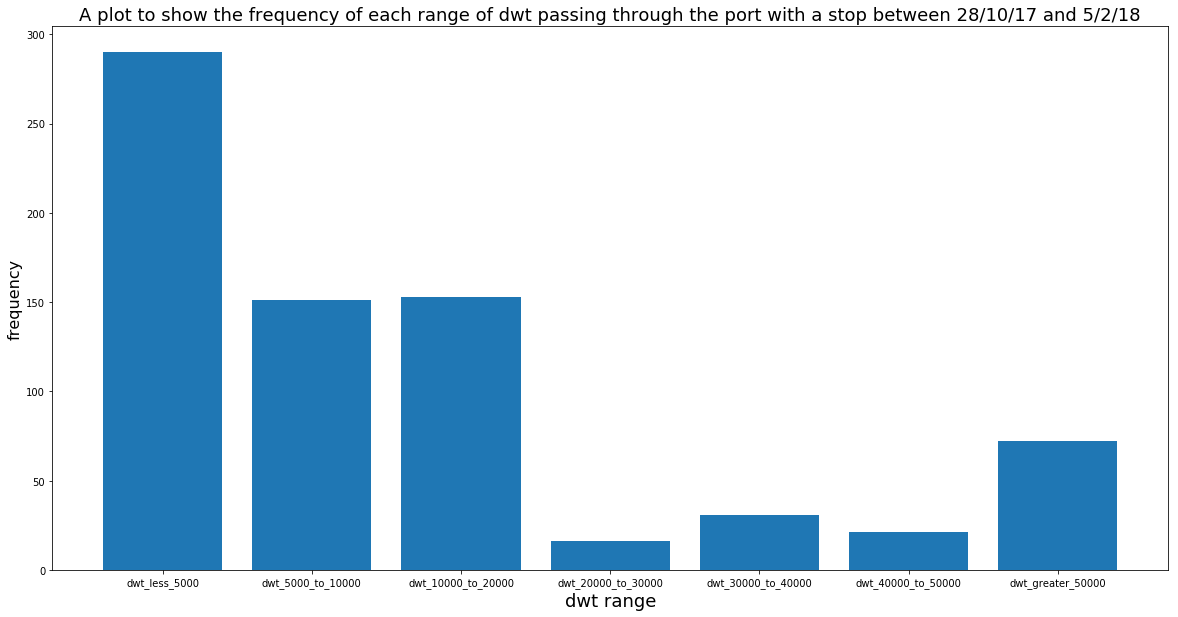

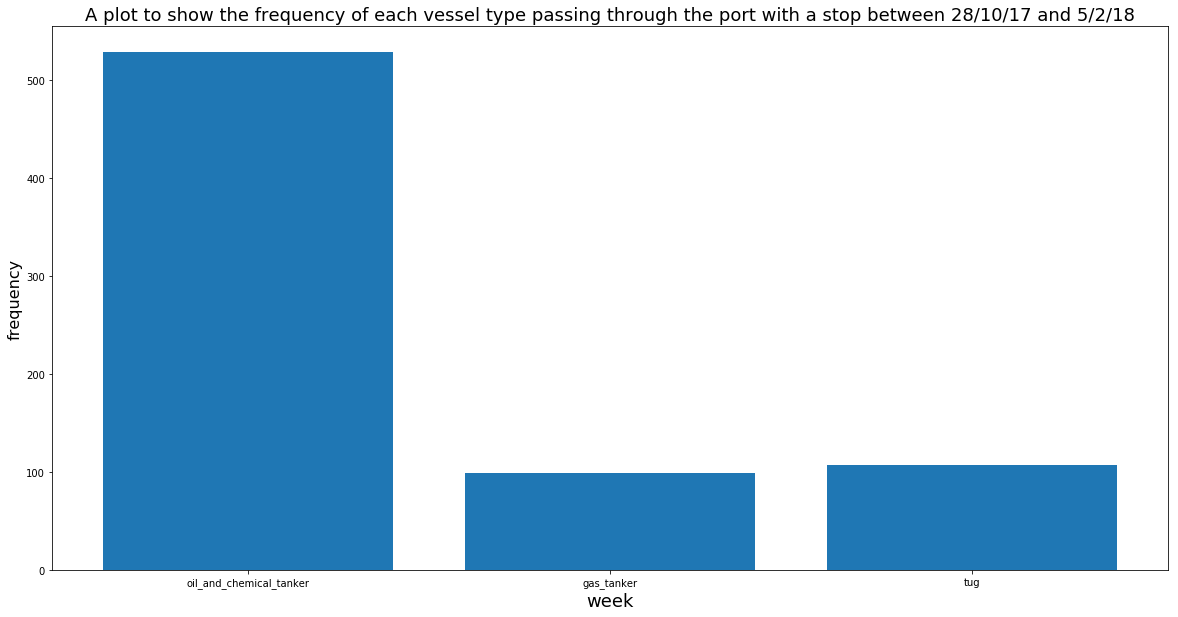

In [812]:
reader = csv.reader(open('sample_port_calls_with_stops_final.csv' , 'rb'))
no_stops_more = csv.writer(open('sample_port_calls_no_stops_more_final.csv' , 'wb'))


#count_enhanced_stops = 0

#prev_IMO = [""] * 23
#prev_IMO[0] = [""]

prev = [""] * 23
prev[7] = [""]

dwt = []
type_of_vessel = []

T_max = 3600        #this is the max time we set to define a stop, in seconds. Set to 1 hour = 60s * 60s = 3600s 


for col in reader:
    
    
    if prev[7] == "facility_enter" and col[7] == "facility_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_facility = col[18]
            t_enh_stop_end_facility = col[19]
        
            t_facility_begin = parser.parse(t_enh_stop_begin_facility)
            t_facility_end = parser.parse(t_enh_stop_end_facility)
        
            t_facility_delta = t_facility_end - t_facility_begin
        
            if t_facility_delta.total_seconds() > T_max:

                print "ship stopped fully at facility"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in facility"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
                
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
        
        #print col[1]
        
        
        
    if prev[7] == "berth_enter" and col[7] == "berth_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_berth = col[20]
            t_enh_stop_end_berth = col[21]
    
            t_berth_begin = parser.parse(t_enh_stop_begin_berth)
            t_berth_end = parser.parse(t_enh_stop_end_berth)
        
            t_berth_delta = t_berth_end - t_berth_begin
        
            if t_berth_delta.total_seconds() > T_max:

                print "ship stopped fully at berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
        
        #print col[1]
        
    if prev[7] == "enhanced_stop_begin" and col[7] == "enhanced_stop_end":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
            
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
        
            if t_enh_stop_delta.total_seconds() > T_max:

                print "ship stopped fully for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
            
        #print col[1]
        
    if prev[7] == "berth_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
            
            
            if t_enh_stop_delta.total_seconds() > T_max:

                print "ship stopped fully for enhanced stop in berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP for enhanced stop in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)

        else:
            
            print "Time unknown due to being in port at time data drawn"       
            #print col[1]
            
        #print col[1]
        
    if prev[7] == "berth_exit" and col[7] == "berth_enter":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_berth = col[20]
            t_enh_stop_end_berth = col[21]
    
            t_berth_begin = parser.parse(t_enh_stop_begin_berth)
            t_berth_end = parser.parse(t_enh_stop_end_berth)
        
            t_berth_delta = t_berth_end - t_berth_begin
        
            if t_berth_delta.total_seconds() > T_max:

                print "ship stopped fully at berth for another time"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in berth for another time"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]
            
        #print col[1]
        
        
    if prev[7] == "port_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_port = col[16]
            t_enh_stop_end_port = col[17]
        
            t_port_begin = parser.parse(t_enh_stop_begin_port)
            t_port_end = parser.parse(t_enh_stop_end_port)
        
            t_port_delta = t_port_end - t_port_begin
        
            if t_port_delta.total_seconds() > T_max:

                print "ship stopped fully at port for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                print "NO STOP in berth for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            #print col[1]     
        
        
 #   prev_IMO[0] = col[0]
 #   prev_IMO = col
            
    prev[7] = col[7]
    prev = col

    
    
 #   type_of_vessel.append(col[2])
 #   dwt.append(col[6])
 #   count_enhanced_stops += 1    


#Ok so now let's build some stats!


dwt_freq = []

for f in dwt:
    dwt_freq.append(dwt.count(f))
    
#print dwt_freq

type_of_vessel_freq = []

for t in type_of_vessel:
    type_of_vessel_freq.append(type_of_vessel.count(t))
    
    

#plt.figure(figsize=(20,10))

#plt.bar(dwt, dwt_freq)
#plt.title('A plot to show the frequency of each type of dwt passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
#plt.xlabel('week', fontsize=18)
#plt.ylabel('frequency', fontsize=16)
#plt.show()

#Okay so the dwt is rarely going to be the same, since each cargo will weigh different! So a better thing to do is 
#to display a RANGE of dwts. Let's do this!

#print dwt

dwt_less_5000_tally = 0
dwt_5000_to_10000_tally = 0
dwt_10000_to_20000_tally = 0
dwt_20000_to_30000_tally = 0
dwt_30000_to_40000_tally = 0
dwt_40000_to_50000_tally = 0
dwt_greater_50000_tally = 0

#need to convert dwt into integer list

dwt = map(int,dwt)


for i in dwt:
    
    if i <= 5000:
    
        dwt_less_5000_tally += 1
        
    if i > 5000 and i <= 10000:
    
        dwt_5000_to_10000_tally += 1
    
    if i > 10000 and i <= 20000:
    
        dwt_10000_to_20000_tally += 1
        
    if i > 20000 and i <= 30000:
    
        dwt_20000_to_30000_tally += 1
        
    if i > 30000 and i <= 40000:
    
        dwt_30000_to_40000_tally += 1
        
    if i > 40000 and i <= 50000:
    
        dwt_40000_to_50000_tally += 1
        
    if i > 50000:
    
        dwt_greater_50000_tally += 1

#print dwt_less_5000

#print dwt_less_5000_tally


dwt_list = ['dwt_less_5000' , 'dwt_5000_to_10000' , 'dwt_10000_to_20000' , 'dwt_20000_to_30000' , 'dwt_30000_to_40000' , 'dwt_40000_to_50000' , 'dwt_greater_50000']

#print dwt_list
    
plt.figure(figsize=(20,10))

plt.bar(dwt_list , (dwt_less_5000_tally, dwt_5000_to_10000_tally, dwt_10000_to_20000_tally, dwt_20000_to_30000_tally, dwt_30000_to_40000_tally, dwt_40000_to_50000_tally, dwt_greater_50000_tally) )
plt.title('A plot to show the frequency of each range of dwt passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('dwt range', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  



plt.figure(figsize=(20,10))

plt.bar(type_of_vessel, type_of_vessel_freq)
plt.title('A plot to show the frequency of each vessel type passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  

And now no_stops:

WIND SOLUTION
WIND SOLUTION
WIND SOLUTION
WIND SOLUTION
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
BLACK WATCH
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA SAPPHIRE
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
SAGA PEARL II
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ARABIAN BREEZE
ASIAN BREEZE
ASIAN BREEZE
AS

RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY
RED OSPREY

RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE
RED EAGLE


AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
PROCYON LEADER
PROCYON LEADER
CRYSTAL RAY
CRYSTAL RAY
CRYSTAL RAY
CRYSTAL RAY
VANCOUVERBORG
VANCOUVERBORG
VANCOUVERBORG
VANCOUVERBORG
VEGA LEADER
VEGA LEADER
VEGA LEADER
VEGA LEADER
OCEAN EAGLE
OCEAN EAGLE
OCEAN EAGLE
OCEAN EAGLE
TAMERLANE
TAMERLANE
TAMERLANE
TAMERLANE
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE SCANDINAVIA
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
GRANDE ELLADE
AKINADA BRIDGE
AKINADA BRIDGE
AKINADA BRIDGE
AKINADA BRIDGE
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
ARCADIA
NAVIGATOR OF THE SEA
NAVIGATOR OF T

ALTAIR LEADER
CATTLEYA ACE
CATTLEYA ACE
KELLY C
KELLY C
KELLY C
KELLY C
KIKKI C
KIKKI C
KIMBERLY C
KIMBERLY C
KIMBERLY C
KIMBERLY C
DIONE LEADER
DIONE LEADER
DIONE LEADER
DIONE LEADER
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
CAPE TOWN HIGHWAY
DALIAN HIGHWAY
DALIAN HIGHWAY
BBC LAGOS
BBC LAGOS
MORNING CHRISTINA
MORNING CHRISTINA
MORNING CHRISTINA
MORNING CHRISTINA
MORNING CRYSTAL
MORNING CRYSTAL
MORNING CRYSTAL
MORNING CRYSTAL
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
DOVER HIGHWAY
APL MIAMI
APL MIAMI
APL MIAMI
APL MIAMI
APL MIAMI
APL MIAMI
APL MIAMI
APL MIAMI
APL CHARLESTON
APL CHARLESTON
APL CHARLESTON
APL CHARLESTON
APL CHARLESTON
APL CHARLESTON
APL CHARLESTON
APL CHARLESTON
EVER LUCKY
EVER LUCKY
EVER LUCKY
EVER LUCKY
EV

JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
JAYNEE W
This ship stayed for more than 1 hour in the port:  JAYNEE W 5:12:49.710000 
JAYNEE W
GRANDE MEDITERRANEO
GRANDE MEDITERRANEO
SVITZER ALMA
SVITZER ALMA
SVITZER ALMA
SVITZER ALMA
CITY OF CHICHESTER
CITY OF CHICHESTER
CITY OF CHICHESTER
CITY OF CHICHESTER
GAS LEGACY
GAS LEGACY
AUTOSTAR
AUTOSTAR
AUTOSTAR
AUTOSTAR
GAS CATHAR
GAS CATHAR
WHITCHALLENGER
WHITCHALLENGER
WHITCHALLENGER
WHITCHALLENGER
WHITCHAMPION
This ship stayed for more than 1 hour in the port:  WHITCHAMPION 12:05:57.306000 
WHITCHAMPION
WHITCHAMPION
WHITCHAMPION
WHITCHAMPION
WHITCHAMPION
GIOVANNI DP
GIOVANNI DP
ELKE W
ELKE W
SPECIALITY
SPECIALITY
LISA
LISA
PROMITHEAS
PROMITHEAS
TAIPAN
TAIPAN
HOEGH DETROIT
HOEGH DETROIT
NYK OLYMPUS
NYK OLYMPUS
MARY A
MARY A
MARY A
This ship stayed for more than 1 hour in the port:  MARY A 1 day, 8:51:02.370000 
MARY A
MARY A
MARY A
CMA CGM ALCAZAR
CMA CGM ALCAZAR
ATLANTIC TWIN
A

HUELIN DISPATCH
HUELIN DISPATCH
HUELIN DISPATCH
HUELIN DISPATCH
HUELIN DISPATCH
HUELIN DISPATCH
HUELIN DISPATCH
STOLT SANDERLING
STOLT SANDERLING
MURRAY STAR
MURRAY STAR
DAYTONA
DAYTONA
BOCHEM CHENNAI
BOCHEM CHENNAI
STOLT REDSHANK
This ship stayed for more than 1 hour in the port:  STOLT REDSHANK 3:13:33.930000 
STOLT REDSHANK
JS ALULAR
JS ALULAR
JS ALULAR
JS ALULAR
GLOVIS COURAGE
GLOVIS COURAGE
BRISOTE
This ship stayed for more than 1 hour in the port:  BRISOTE 19:59:53.443000 
BRISOTE
BRISOTE
This ship stayed for more than 1 hour in the port:  BRISOTE 18:53:30.116000 
BRISOTE
BW OSPREY
BW OSPREY


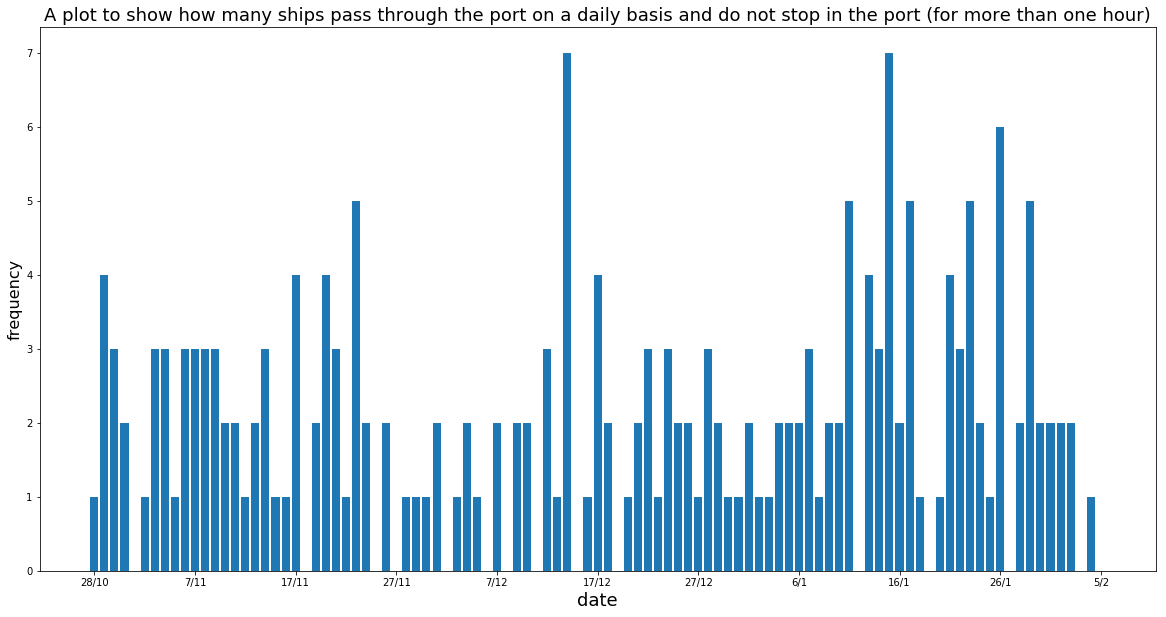

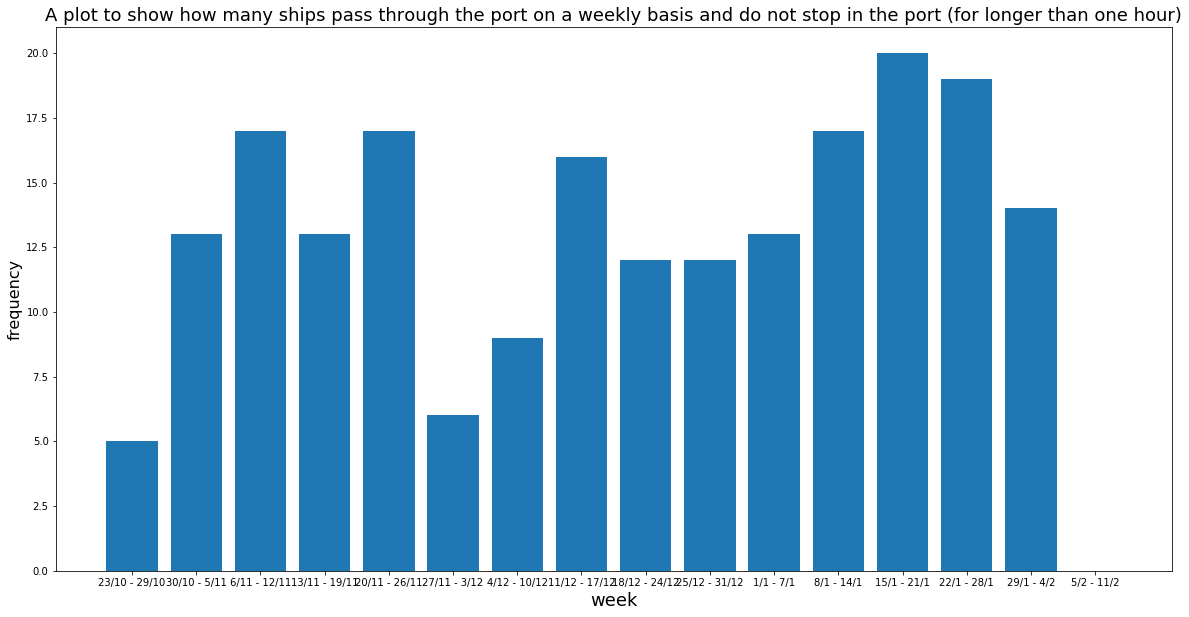

In [814]:
reader_merged = csv.reader(open('sample_port_calls_no_stops_merged_final.csv' , 'rb'))   #just changed this to the new, merged file

T_max = 3600 

year_count_2017 = 0
year_count_2018 = 0

month_count_Oct = 0
month_count_Nov = 0
month_count_Dec = 0
month_count_Jan = 0
month_count_Feb = 0
    
arr_Oct_28 = 0
arr_Oct_29 = 0
arr_Oct_30 = 0
arr_Oct_31 = 0

arr_Nov_1 = 0
arr_Nov_2 = 0
arr_Nov_3 = 0
arr_Nov_4 = 0
arr_Nov_5 = 0
arr_Nov_6 = 0
arr_Nov_7 = 0
arr_Nov_8 = 0
arr_Nov_9 = 0
arr_Nov_10 = 0
arr_Nov_11 = 0
arr_Nov_12 = 0
arr_Nov_13 = 0
arr_Nov_14 = 0
arr_Nov_15 = 0
arr_Nov_16 = 0
arr_Nov_17 = 0
arr_Nov_18 = 0
arr_Nov_19 = 0
arr_Nov_20 = 0
arr_Nov_21 = 0
arr_Nov_22 = 0
arr_Nov_23 = 0
arr_Nov_24 = 0
arr_Nov_25 = 0
arr_Nov_26 = 0
arr_Nov_27 = 0
arr_Nov_28 = 0
arr_Nov_29 = 0
arr_Nov_30 = 0

arr_Dec_1 = 0
arr_Dec_2 = 0
arr_Dec_3 = 0
arr_Dec_4 = 0
arr_Dec_5 = 0
arr_Dec_6 = 0
arr_Dec_7 = 0
arr_Dec_8 = 0
arr_Dec_9 = 0
arr_Dec_10 = 0
arr_Dec_11 = 0
arr_Dec_12 = 0
arr_Dec_13 = 0
arr_Dec_14 = 0
arr_Dec_15 = 0
arr_Dec_16 = 0
arr_Dec_17 = 0
arr_Dec_18 = 0
arr_Dec_19 = 0
arr_Dec_20 = 0
arr_Dec_21 = 0
arr_Dec_22 = 0
arr_Dec_23 = 0
arr_Dec_24 = 0
arr_Dec_25 = 0
arr_Dec_26 = 0
arr_Dec_27 = 0
arr_Dec_28 = 0
arr_Dec_29 = 0
arr_Dec_30 = 0
arr_Dec_31 = 0

arr_Jan_1 = 0
arr_Jan_2 = 0
arr_Jan_3 = 0
arr_Jan_4 = 0
arr_Jan_5 = 0
arr_Jan_6 = 0
arr_Jan_7 = 0
arr_Jan_8 = 0
arr_Jan_9 = 0
arr_Jan_10 = 0
arr_Jan_11 = 0
arr_Jan_12 = 0
arr_Jan_13 = 0
arr_Jan_14 = 0
arr_Jan_15 = 0
arr_Jan_16 = 0
arr_Jan_17 = 0
arr_Jan_18 = 0
arr_Jan_19 = 0
arr_Jan_20 = 0
arr_Jan_21 = 0
arr_Jan_22 = 0
arr_Jan_23 = 0
arr_Jan_24 = 0
arr_Jan_25 = 0
arr_Jan_26 = 0
arr_Jan_27 = 0
arr_Jan_28 = 0
arr_Jan_29 = 0
arr_Jan_30 = 0
arr_Jan_31 = 0

arr_Feb_1 = 0
arr_Feb_2 = 0
arr_Feb_3 = 0
arr_Feb_4 = 0
arr_Feb_5 = 0
arr_Feb_6 = 0
arr_Feb_7 = 0
arr_Feb_8 = 0
arr_Feb_9 = 0
arr_Feb_10 = 0
arr_Feb_11 = 0
arr_Feb_12 = 0
arr_Feb_13 = 0
arr_Feb_14 = 0
arr_Feb_15 = 0
arr_Feb_16 = 0
arr_Feb_17 = 0
arr_Feb_18 = 0
arr_Feb_19 = 0
arr_Feb_20 = 0
arr_Feb_21 = 0
arr_Feb_22 = 0
arr_Feb_23 = 0
arr_Feb_24 = 0
arr_Feb_25 = 0
arr_Feb_26 = 0
arr_Feb_27 = 0
arr_Feb_28 = 0

#and now for the weekly totals

wk1 = arr_wk_23_29_Oct_17 = 0
wk2 = arr_wk_30_Oct_5_Nov_17 = 0
wk3 = arr_wk_6_12_Nov_17 = 0
wk4 = arr_wk_13_19_Nov_17 = 0
wk5 = arr_wk_20_26_Nov_17 = 0
wk6 = arr_wk_27_Nov_3_Dec_17 = 0
wk7 = arr_wk_4_10_Dec_17 = 0
wk8 = arr_wk_11_17_Dec_17 = 0
wk9 = arr_wk_18_24_Dec_17 = 0
wk10 = arr_wk_25_31_Dec_17 = 0
wk11 = arr_wk_1_7_Jan_18 = 0
wk12 = arr_wk_8_14_Jan_18 = 0
wk13 = arr_wk_15_21_Jan_18 = 0
wk14 = arr_wk_22_28_Jan_18 = 0
wk15 = arr_wk_29_Jan_4_Feb_18 = 0
wk16 = arr_wk_5_11_Feb_18 = 0

prev = [""] * 23

prev[16] = [""]
prev[18] = [""]
prev[20] = [""]



for col in reader_merged:

#need to add in a few if statements to make sure we are capturing the correct arrival time for each event    

    print col[1]
    
    if col[16] == prev[16] :           #need this to make sure we aren't counting data twice
            
        continue
        
    elif col[18] == "" and col[20] == "" :

        list_arr = col[16]
         
        if col[17] != "TIMENOW":       #actually maybe we don't need these if statements since there are no "TIMENOW"s in this data set. But keep in just in case needed in the future
        
            list_dep = col[17]
            
        else:
                
            print "Departure time unknown as data drawn when ship in dock"
    
    if col[18] == prev[18] :                 #also needed to make sure not counting data twice
    
        continue
                   
    elif col[18] != "" and col[20] == "" :
                
            list_arr = col[18]
        
            if col[19] != "TIMENOW":
        
                list_dep = col[19]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"

    if col[20] == prev[20] :          #and once again to make sure not counting data twice
        
        continue
    
    elif col[18] != "" and col[20] != "" :
        
            list_arr = col[20]         
            
            if col[21] != ["TIMENOW"]:
                
                list_dep = col[21]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"
            
    
    arr = parser.parse(list_arr)
    dep = parser.parse(list_dep)

    t_delta = dep - arr
    
    
    if t_delta.total_seconds() > T_max:
    
        print "This ship stayed for more than 1 hour in the port: " , col[1] , t_delta , ""
    
    
    prev[16] = col[16]
    prev[18] = col[18]
    prev[20] = col[20]
    
    prev = col
    
    
#keep track of the year

    if arr.year == 2017:
        
        year_count_2017 += 1
        
    if arr.year == 2018:
        
        year_count_2018 += 1
        
#October:


    if arr.month == 10:
       
        month_count_Oct += 1
 
        if arr.day == 28:
            
            arr_Oct_28 += 1
            wk1 += 1
        
        if arr.day == 29:
            
            arr_Oct_29 += 1
            wk1 += 1
            
        if arr.day == 30:
            
            arr_Oct_30 += 1
            wk2 += 1
            
        if arr.day == 31:
            
            arr_Oct_31 += 1
            wk2 += 1
                
                
#November:
                
    
    if arr.month == 11:
            
            month_count_Nov += 1
            
            if arr.day == 1:
                
                arr_Nov_1 += 1
                wk2 += 1
                
            if arr.day == 2:
                
                arr_Nov_2 += 1
                wk2 += 1
                
            if arr.day == 3:
                
                arr_Nov_3 += 1
                wk2 += 1
                
            if arr.day == 4:
                
                arr_Nov_4 += 1
                wk2 += 1
                
            if arr.day == 5:
                
                arr_Nov_5 += 1
                wk2 += 1
                
            if arr.day == 6:
                
                arr_Nov_6 += 1
                wk3 += 1
                
            if arr.day == 7:
                
                arr_Nov_7 += 1
                wk3 += 1
                
            if arr.day == 8:
                
                arr_Nov_8 += 1
                wk3 += 1
                
            if arr.day == 9:
                
                arr_Nov_9 += 1
                wk3 += 1
                
            if arr.day == 10:
                
                arr_Nov_10 += 1
                wk3 += 1
                
            if arr.day == 11:
                
                arr_Nov_11 += 1
                wk3 += 1
                
            if arr.day == 12:
                
                arr_Nov_12 += 1
                wk3 += 1
                
            if arr.day == 13:
                
                arr_Nov_13 += 1
                wk4 += 1
                
            if arr.day == 14:
                
                arr_Nov_14 += 1
                wk4 += 1
                
            if arr.day == 15:
                
                arr_Nov_15 += 1
                wk4 += 1
                
            if arr.day == 16:
                
                arr_Nov_16 += 1
                wk4 += 1
                
            if arr.day == 17:
                
                arr_Nov_17 += 1
                wk4 += 1
                
            if arr.day == 18:
                
                arr_Nov_18 += 1
                wk4 += 1
                
            if arr.day == 19:
                
                arr_Nov_19 += 1
                wk4 += 1
                
            if arr.day == 20:
                
                arr_Nov_20 += 1
                wk5 += 1
                
            if arr.day == 21:
                
                arr_Nov_21 += 1
                wk5 += 1
                
            if arr.day == 22:
                
                arr_Nov_22 += 1
                wk5 += 1
                
            if arr.day == 23:
                
                arr_Nov_23 += 1
                wk5 += 1
                
            if arr.day == 24:
                
                arr_Nov_24 += 1
                wk5 += 1
                
            if arr.day == 25:
                
                arr_Nov_25 += 1
                wk5 += 1
                
            if arr.day == 26:
                
                arr_Nov_26 += 1
                wk5 += 1
                
            if arr.day == 27:
                
                arr_Nov_27 += 1
                wk6 += 1
                
            if arr.day == 28:
                
                arr_Nov_28 += 1
                wk6 += 1
                
            if arr.day == 29:
                
                arr_Nov_29 += 1
                wk6 += 1
                
            if arr.day == 30:
                
                arr_Nov_30 += 1
                wk6 += 1
#December:            

    if arr.month == 12:
            
            month_count_Dec += 1
            
            if arr.day == 1:
                
                arr_Dec_1 += 1
                wk6 += 1
                
            if arr.day == 2:
                
                arr_Dec_2 += 1
                wk6 += 1
                
            if arr.day == 3:
                
                arr_Dec_3 += 1
                wk6 += 1
                
            if arr.day == 4:
                
                arr_Dec_4 += 1
                wk7 += 1
                
            if arr.day == 5:
                
                arr_Dec_5 += 1
                wk7 += 1
                
            if arr.day == 6:
                
                arr_Dec_6 += 1
                wk7 += 1
                
            if arr.day == 7:
                
                arr_Dec_7 += 1
                wk7 += 1
                
            if arr.day == 8:
                
                arr_Dec_8 += 1
                wk7 += 1
                
            if arr.day == 9:
                
                arr_Dec_9 += 1
                wk7 += 1
                
            if arr.day == 10:
                
                arr_Dec_10 += 1
                wk7 += 1
                
            if arr.day == 11:
                
                arr_Dec_11 += 1
                wk8 += 1
                
            if arr.day == 12:
                
                arr_Dec_12 += 1
                wk8 += 1
                
            if arr.day == 13:
                
                arr_Dec_13 += 1
                wk8 += 1
                
            if arr.day == 14:
                
                arr_Dec_14 += 1
                wk8 += 1
                
            if arr.day == 15:
                
                arr_Dec_15 += 1
                wk8 += 1
                
            if arr.day == 16:
                
                arr_Dec_16 += 1
                wk8 += 1
                
            if arr.day == 17:
                
                arr_Dec_17 += 1
                wk8 += 1
                
            if arr.day == 18:
                
                arr_Dec_18 += 1
                wk9 += 1
                
            if arr.day == 19:
                
                arr_Dec_19 += 1
                wk9 += 1
                
            if arr.day == 20:
                
                arr_Dec_20 += 1
                wk9 += 1
                
            if arr.day == 21:
                
                arr_Dec_21 += 1
                wk9 += 1
                
            if arr.day == 22:
                
                arr_Dec_22 += 1
                wk9 += 1
                
            if arr.day == 23:
                
                arr_Dec_23 += 1
                wk9 += 1
                
            if arr.day == 24:
                
                arr_Dec_24 += 1
                wk9 += 1
                
            if arr.day == 25:
                
                arr_Dec_25 += 1
                wk10 += 1
                
            if arr.day == 26:
                
                arr_Dec_26 += 1
                wk10 += 1
                
            if arr.day == 27:
                
                arr_Dec_27 += 1
                wk10 += 1
                
            if arr.day == 28:
                
                arr_Dec_28 += 1
                wk10 += 1
                
            if arr.day == 29:
                
                arr_Dec_29 += 1
                wk10 += 1
                
            if arr.day == 30:
                
                arr_Dec_30 += 1
                wk10 += 1
                
            if arr.day == 31:
                
                arr_Dec_31 += 1
                wk10 += 1

 #January:

    if arr.month == 1:
        
            month_count_Jan += 1
            
            if arr.day == 1:
                
                arr_Jan_1 += 1
                wk11 += 1
                
            if arr.day == 2:
                
                arr_Jan_2 += 1
                wk11 += 1
                
            if arr.day == 3:
                
                arr_Jan_3 += 1
                wk11 += 1
                
            if arr.day == 4:
                
                arr_Jan_4 += 1
                wk11 += 1
                
            if arr.day == 5:
                
                arr_Jan_5 += 1
                wk11 += 1
                
            if arr.day == 6:
                
                arr_Jan_6 += 1
                wk11 += 1
                
            if arr.day == 7:
                
                arr_Jan_7 += 1
                wk11 += 1
                
            if arr.day == 8:
                
                arr_Jan_8 += 1
                wk12 += 1
                
            if arr.day == 9:
                
                arr_Jan_9 += 1
                wk12 += 1
                
            if arr.day == 10:
                
                arr_Jan_10 += 1
                wk12 += 1
                
            if arr.day == 11:
                
                arr_Jan_11 += 1
                wk12 += 1
                
            if arr.day == 12:
                
                arr_Jan_12 += 1
                wk12 += 1
                
            if arr.day == 13:
                
                arr_Jan_13 += 1
                wk12 += 1
                
            if arr.day == 14:
                
                arr_Jan_14 += 1
                wk12 += 1
                
            if arr.day == 15:
                
                arr_Jan_15 += 1
                wk13 += 1
                
            if arr.day == 16:
                
                arr_Jan_16 += 1
                wk13 += 1
                
            if arr.day == 17:
                
                arr_Jan_17 += 1
                wk13 += 1
                
            if arr.day == 18:
                
                arr_Jan_18 += 1
                wk13 += 1
                
            if arr.day == 19:
                
                arr_Jan_19 += 1
                wk13 += 1
                
            if arr.day == 20:
                
                arr_Jan_20 += 1
                wk13 += 1
                
            if arr.day == 21:
                
                arr_Jan_21 += 1
                wk13 += 1
                
            if arr.day == 22:
                
                arr_Jan_22 += 1
                wk14 += 1
                
            if arr.day == 23:
                
                arr_Jan_23 += 1
                wk14 += 1
                
            if arr.day == 24:
                
                arr_Jan_24 += 1
                wk14 += 1
                
            if arr.day == 25:
                
                arr_Jan_25 += 1
                wk14 += 1
                
            if arr.day == 26:
                
                arr_Jan_26 += 1
                wk14 += 1
                
            if arr.day == 27:
                
                arr_Jan_27 += 1
                wk14 += 1
                
            if arr.day == 28:
                
                arr_Jan_28 += 1
                wk14 += 1
                
            if arr.day == 29:
                
                arr_Jan_29 += 1
                wk15 += 1
                
            if arr.day == 30:
                
                arr_Jan_30 += 1
                wk15 += 1
                
            if arr.day == 31:
                
                arr_Jan_31 += 1
                wk15 += 1
                
           
                
                
#February:        
        
    if arr.month == 2:
        
            month_count_Feb += 1
            
            if arr.day == 1:
                
                arr_Feb_1 += 1
                wk15 += 1
                
            if arr.day == 2:
                
                arr_Feb_2 += 1
                wk15 += 1
                
            if arr.day == 3:
                
                arr_Feb_3 += 1
                wk15 += 1
                
            if arr.day == 4:
                
                arr_Feb_4 += 1
                wk15 += 1
                
            if arr.day == 5:
                
                arr_Feb_5 += 1
                wk16 += 1
    
    
#Note: we need to divide by two since for every data entry there is a port entry and port departure, but this information 
#is captured in just one of the rows. However now this data is intermixed with some that doesn't duplicate! So we need to
#filter out the data before we plot it, i.e. in the code. Let's do it!


x_day = (arr_Oct_28,arr_Oct_29,arr_Oct_30,arr_Oct_31,arr_Nov_1,arr_Nov_2,arr_Nov_3,arr_Nov_4,arr_Nov_5,arr_Nov_6,arr_Nov_7,arr_Nov_8,arr_Nov_9,arr_Nov_10,arr_Nov_11,arr_Nov_12,arr_Nov_13,arr_Nov_14,arr_Nov_15,arr_Nov_16,arr_Nov_17,arr_Nov_18,arr_Nov_19,arr_Nov_20,arr_Nov_21,arr_Nov_22,arr_Nov_23,arr_Nov_24,arr_Nov_25,arr_Nov_26,arr_Nov_27,arr_Nov_28,arr_Nov_29,arr_Nov_30,arr_Dec_1,arr_Dec_2,arr_Dec_3,arr_Dec_4,arr_Dec_5,arr_Dec_6,arr_Dec_7,arr_Dec_8,arr_Dec_9,arr_Dec_10,arr_Dec_11,arr_Dec_12,arr_Dec_13,arr_Dec_14,arr_Dec_15,arr_Dec_16,arr_Dec_17,arr_Dec_18,arr_Dec_19,arr_Dec_20,arr_Dec_21,arr_Dec_22,arr_Dec_23,arr_Dec_24,arr_Dec_25,arr_Dec_26,arr_Dec_27,arr_Dec_28,arr_Dec_29,arr_Dec_30,arr_Dec_31,arr_Jan_1,arr_Jan_2,arr_Jan_3,arr_Jan_4,arr_Jan_5,arr_Jan_6,arr_Jan_7,arr_Jan_8,arr_Jan_9,arr_Jan_10,arr_Jan_11,arr_Jan_12,arr_Jan_13,arr_Jan_14,arr_Jan_15,arr_Jan_16,arr_Jan_17,arr_Jan_18,arr_Jan_19,arr_Jan_20,arr_Jan_21,arr_Jan_22,arr_Jan_23,arr_Jan_24,arr_Jan_25,arr_Jan_26,arr_Jan_27,arr_Jan_28,arr_Jan_29,arr_Jan_30,arr_Jan_31,arr_Feb_1,arr_Feb_2,arr_Feb_3,arr_Feb_4,arr_Feb_5)

y_day = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]

fig, ax = plt.subplots()

ax.bar(y_day,x_day)

ax.set_xticks(ax.get_xticks()[::10])
plt.title('A plot to show how many ships pass through the port on a daily basis and do not stop in the port (for more than one hour)',fontsize=18)
plt.xlabel('date', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

#now let's do the weekly plot

x_week = (wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16)

y_week = ["23/10 - 29/10" , "30/10 - 5/11" , "6/11 - 12/11" , "13/11 - 19/11" , "20/11 - 26/11" , "27/11 - 3/12" , "4/12 - 10/12" , "11/12 - 17/12" , "18/12 - 24/12" , "25/12 - 31/12" , "1/1 - 7/1" , "8/1 - 14/1" , "15/1 - 21/1" , "22/1 - 28/1" , "29/1 - 4/2" , "5/2 - 11/2"]

plt.figure(figsize=(20,10))


plt.bar(y_week,x_week)

plt.title('A plot to show how many ships pass through the port on a weekly basis and do not stop in the port (for longer than one hour)',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

As a final check I looked to see if the final data sizes added up to the original - I found I was 1130 bytes over the original sample file! Not sure exactly how I've managed to create data - have gone back and checked a couple of times with no luck. Is this something that can happen?

But other than that I'm happy with my work so far - if I had more time I'd like to troubleshoot the data size issue mentioned above, and also play a bit more with the stats, test the code a bit more. But I've spent a few days on it now and think now is a good time to stop. It'd be nice to get some feedback on the task and see how close I have come to completing it fully.